<a href="https://colab.research.google.com/github/edx04/data-science/blob/main/Entrega3Arellano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detección de fraude en reclamaciones de seguro de automoviles** 

# Presentacion del problema




El fraude en la industria de los seguros ha mantenido su ritmo de crecimiento en los últimos años y a pesar de todas las tecnologías existentes no se ha podido disminuir el crecimiento y se hace cada vez más difícil su detección, pues los esquemas utilizados por los defraudadores siguen evolucionando.

Hoy en día, el fraude sigue siendo un gran problema para las aseguradoras. Tan solo en el 2019 en México se tuvo una pérdida de 430 millones de pesos en los seguros de automóviles ligados al fraude. Por lo cual, es necesario empezar a controlar estos reclamos. Esto se puede lograr a través de auditorías, sin embargo, debido a su costo, no es posible auditar todas las reclamaciones.

Por ello, una de las soluciones es hacer uso de modelos de aprendizaje máquina. El objetivo de este proyecto es investigar, analizar y evaluar el impacto que tienen los fraudes en los seguros de automóviles en la sociedad, así como analizar posteriormente diferentes modelos de aprendizaje máquina para poder predecir fraudes en automóviles para poder así prevenirlos y lograr una reducción en los costos de operación de las aseguradoras, misma que debería de reflejarse en una reducción de las primas, beneficiando así a los asegurados.

# PREGUNTAS A RESOLVER

Se puede generar un modelo para detectar la mayor cantidad de fraudes?

¿Cuales variables que mas se relacion tienen con los casos de fraude?
 

Con base en la pregunta anterior, se busca determinar como ASEGURADORA si las reclamaciones que se realizan día con día son fraude o no y así, verificar y prestar más atención a las variables antes mencionadas.

De acuerdo con los puntos anteriores y el impacto que tienen los fraudes en los seguros de automóviles en la sociedad, con este proyecto se busca analizar e investigar diferentes modelos de aprendizaje máquina para predecir fraudes en las reclamaciones de los seguros de automóviles, para poder así prevenirlos y lograr una reducción en los costos de operación de las aseguradoras, mismas que deberían reflejarse en una reducción en las primas, beneficiando así a los asegurados.


# Seleccion Dataset

El dataset que se va usar es una muestra de reclamos de seguros en Estados unidos

Se seleccionó porque es de un tamaño relativamente pequeño con el cual se puede trabajar de manera local

LINK: https://raw.githubusercontent.com/edx04/data-science/main/data/insurance_claims.csv

**Variables**

Cada fila es un caso de reclamación de un seguro de auto, dando información sobre el cliente, las caracteristicas del automovil, la cantidad de dinero que se pago en ese evento,en que ciudad sucedio y si se reporto ese caso como fraude

# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/edx04/data-science/main/data/insurance_claims.csv")



Primero revisamoslos primeros y ultimos datos del dataset, para analizar las columnas y los valores.

In [3]:
df.head(5)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


¿Qué tamaño tiene mi conjunto de datos? 

In [5]:
df.shape

(1000, 40)

Podemos notar que el conjunto de datos tiene 1000 filas y 40 columnas, lo cual, tiene un buen tamaño para ser procesado por medio de técnicas de clasificación.

* ¿Qué columnas tengo y qué información tengo en cada una de esas columnas?




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### Cuantos de los datos son casos de fraude?

In [8]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1,0))

df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Univariado

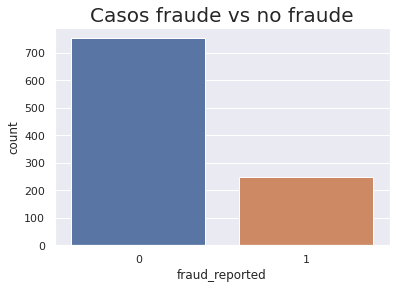

In [9]:
plt.title('Casos fraude vs no fraude', fontsize = 20)
sns.countplot(x='fraud_reported',data=df)

Podemos notar que de los mil datos 247 Fraudes y 753 no fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


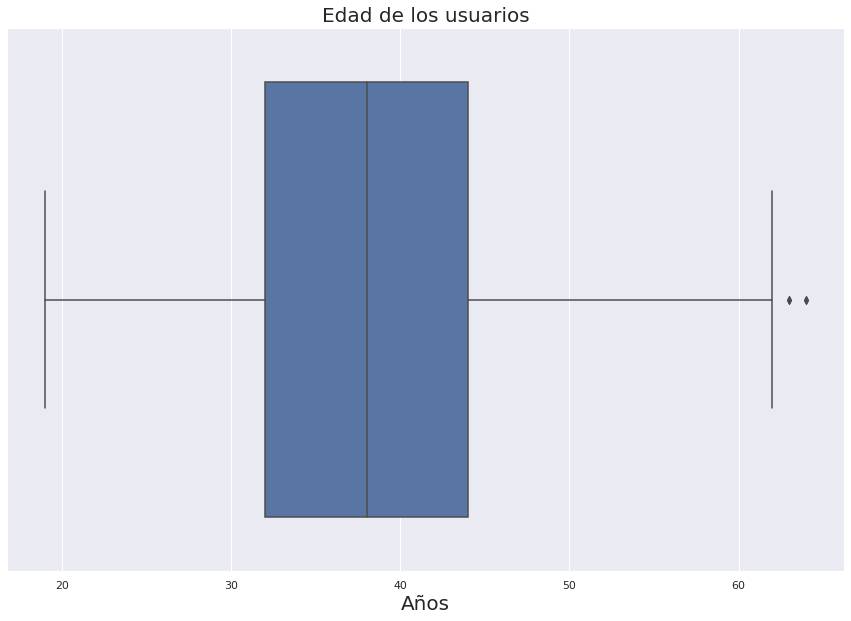

In [10]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Edad de los usuarios', fontsize = 20)
p = sns.boxplot(df['age'],orient='v')
p = p.set_xlabel("Años", fontsize = 20)



En la mayoria de casos las personas tienen en promedio 38 años

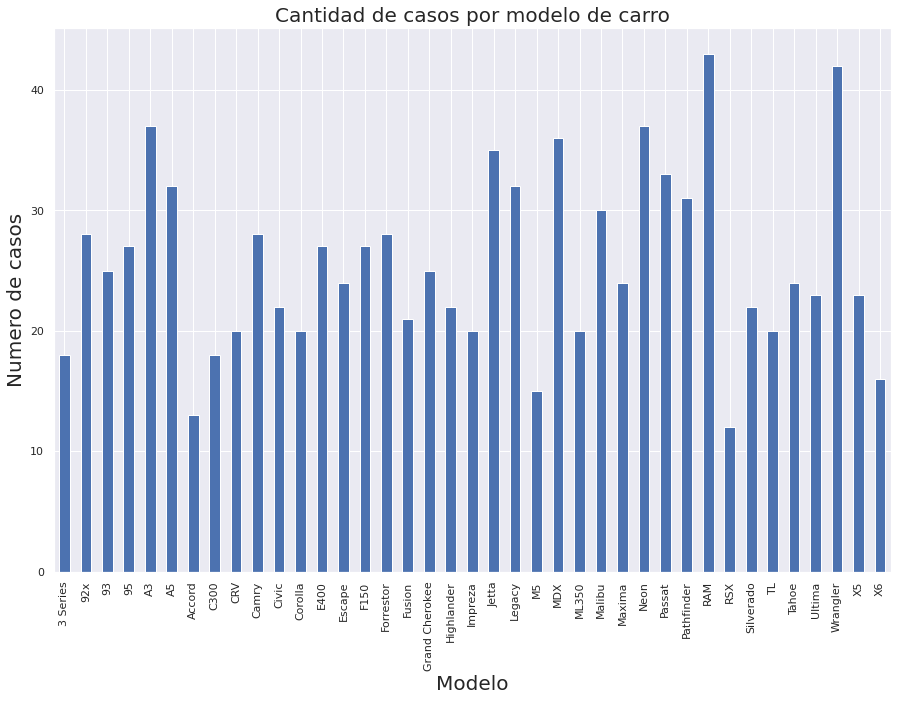

In [11]:
#Marcas por caso
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Cantidad de casos por modelo de carro', fontsize = 20)
plt.xlabel("Modelo", fontsize = 20)
plt.ylabel("Numero de casos", fontsize = 20)
df.auto_model.value_counts().sort_index().plot.bar()

Con los modelos que mas casos hay son: RAM, Wrangler, A3 y Neon

#Bivariado

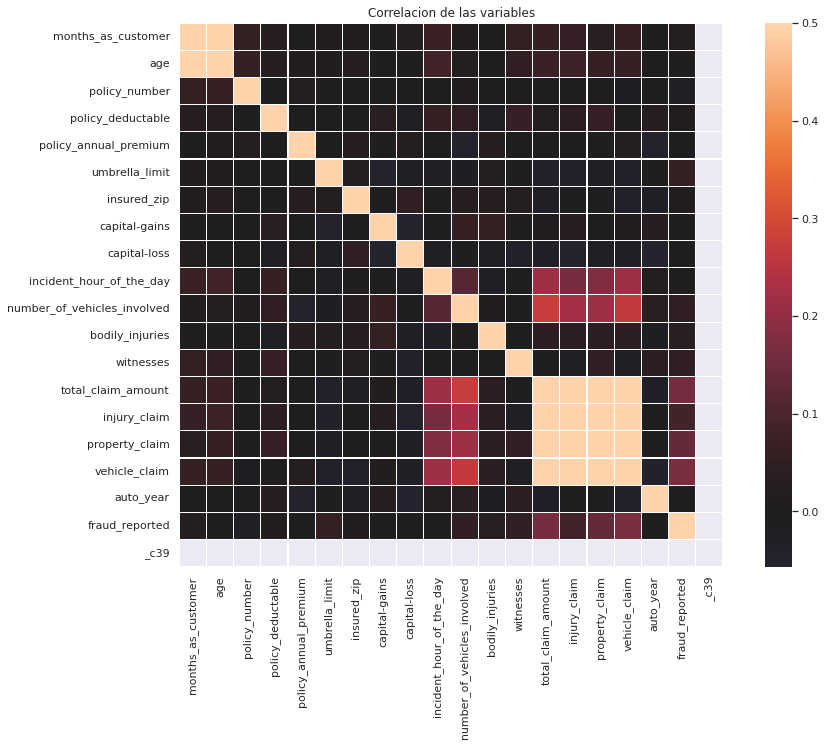

In [12]:
plt.title("Correlacion de las variables")
sns.heatmap(df.corr(), vmax=.5, center=0, annot=False, square=True, linewidths=.1)

Las variables que presentan una mayor correlacion entre ellas son age y months as coustomer y las variables que tienen que ver con el monto reclamado comp injury claim, property claim y vehicle_claim

Text(0, 0.5, 'Marca')

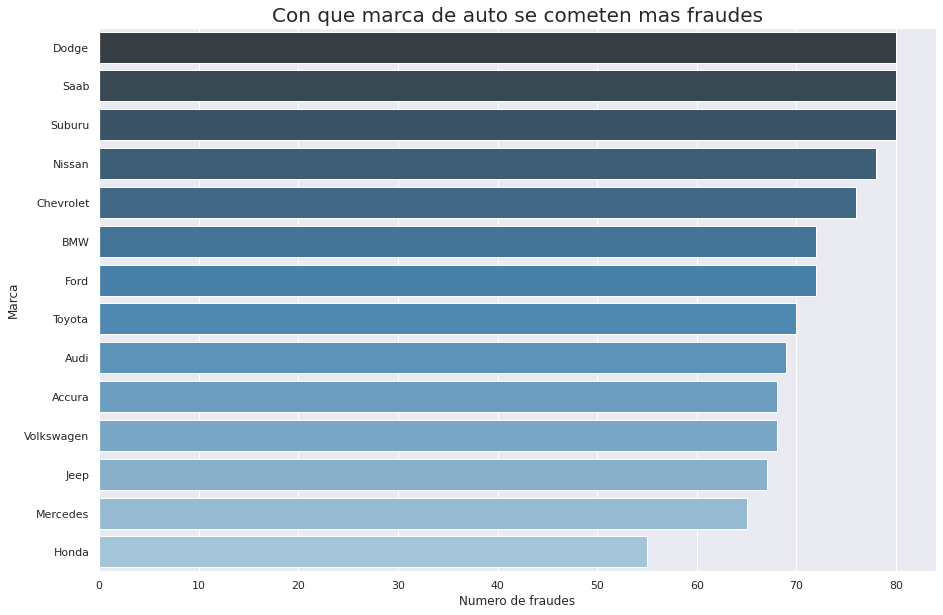

In [13]:
proporcion_df = df[['auto_make','fraud_reported']].groupby(['auto_make']).count().sort_values(by = 'fraud_reported', ascending = False)
proporcion_df.reset_index(inplace=True)
sns.barplot(data=proporcion_df , y='auto_make', x='fraud_reported', palette="Blues_r_d")
plt.title("Con que marca de auto se cometen mas fraudes", fontsize = 20)
plt.xlabel("Numero de fraudes")
plt.ylabel("Marca")




Con la

Text(0, 0.5, 'Numero de fraudes')

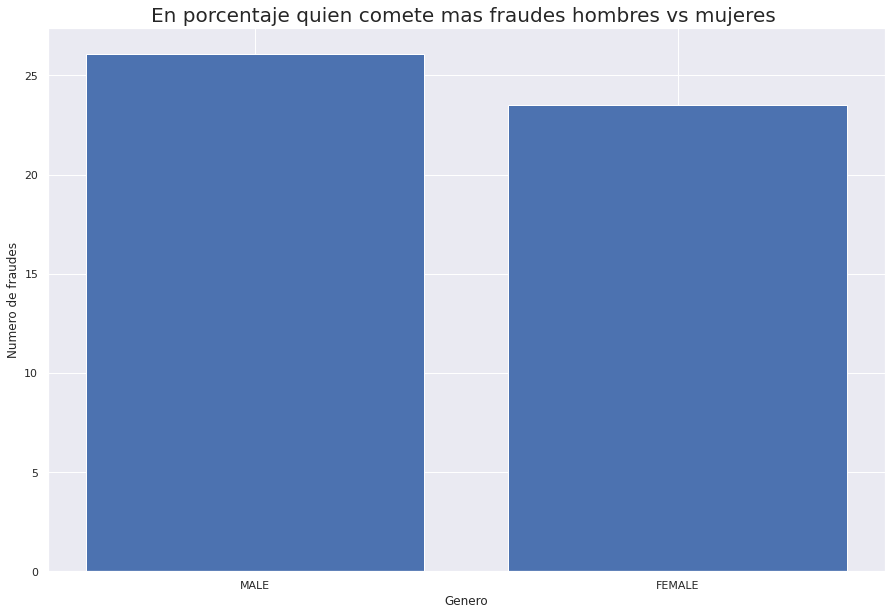

In [14]:
proporcion_df = df[['insured_sex','fraud_reported']].groupby(['insured_sex']).mean().sort_values(by = 'fraud_reported', ascending = False).round(3).multiply(100)
proporcion_df.reset_index(inplace=True)
plt.bar(proporcion_df['insured_sex'],proporcion_df['fraud_reported'])
plt.title("En porcentaje quien comete mas fraudes hombres vs mujeres ", fontsize = 20)
plt.xlabel("Genero")
plt.ylabel("Numero de fraudes")

## Multivariado

In [15]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


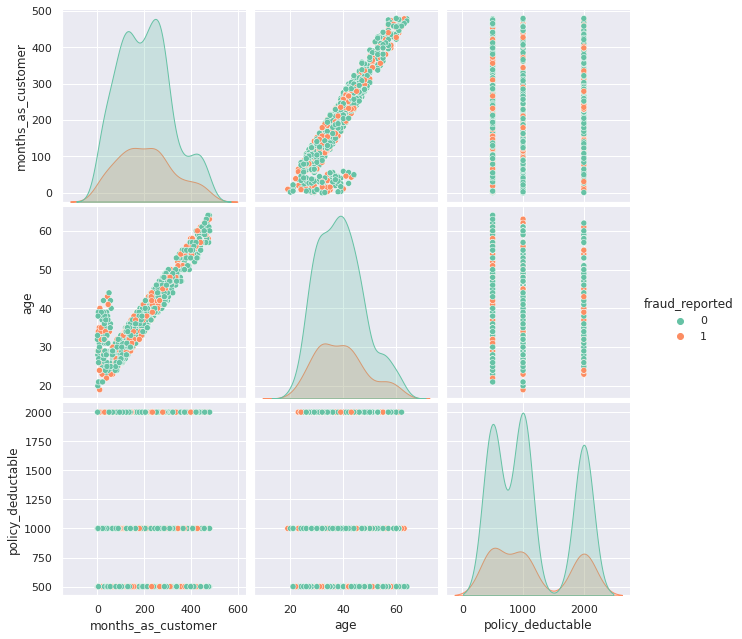

In [16]:
df_pair = df[['months_as_customer','age','auto_model','policy_deductable','fraud_reported']]
p = sns.pairplot(df_pair,hue = 'fraud_reported' , size = 3 , palette = 'Set2')


# Procesamiento de Datos

In [17]:
#funcion auxiliar para crear la tabla con el numero de valores unicos
def unique_values(x):
  temp_dict = {}
  for i in x:
    num_uniques = df[i].nunique()
    temp_dict[i] = num_uniques
  return pd.DataFrame.from_dict(temp_dict,orient='index',columns=['valores_unicos'])

In [18]:
#obtenemos las variables tipo object
df_object=df.loc[:, df.dtypes == object]
object_columns = df_object.columns
print(object_columns)



Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')


In [19]:
#obtenemos los vlaores unicos de las columnas con tipo unique

unique_values(object_columns)



,valores_unicos
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


In [20]:
#Checamos los valores NaN
df = df.replace('?',np.NaN)
df.isna().sum(axis=0)

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [21]:
proporcion_nan_collision_type = df.isna().sum(axis=0)['collision_type']/len(df)*100
proporcion_nan_property_damage = df.isna().sum(axis=0)['property_damage']/len(df)*100
proporcion_nan_police_report_available = df.isna().sum(axis=0)['police_report_available']/len(df)*100
print(f'- Los NaN de la variable "collision_type" representan un {proporcion_nan_collision_type.round(2)}% de los datos')
print(f'- Los NaN de la variable "property_damage" representan un {proporcion_nan_property_damage.round(2)}% de los datos')
print(f'- Los NaN de la variable "police_report_available" representan un {proporcion_nan_police_report_available.round(2)}% de los datos')


- Los NaN de la variable "collision_type" representan un 17.8% de los datos
- Los NaN de la variable "property_damage" representan un 36.0% de los datos
- Los NaN de la variable "police_report_available" representan un 34.3% de los datos


Podemos ver que en los casos de property_damage y police_report_available es porcentajede null values es muy significativo, debido a esto por el momento no se utilizaran esas dos columnas para el modelo predictivo 

In [22]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,0,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,0,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,0,NaN


In [23]:
# Eliiminamos la columna _c39 
df = df.dropna(axis=1, how = "all")
df = df.drop(columns=['property_damage','police_report_available'])
df = df.replace(np.NaN,'?')

In [24]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,1,2,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0,1,6500,1300,650,4550,Accura,RSX,2009,0



# Transformación de Datos

---




La columna incident location como se veia en la tabla de unique values todos sus valores son distintos pero si utilizamos la parte final del string nos puede ser de utilidad

In [25]:
df['incident_location'].head(10)

0        9935 4th Drive
1          6608 MLK Hwy
2     7121 Francis Lane
3      6956 Maple Drive
4          3041 3rd Ave
5    8973 Washington St
6     5846 Weaver Drive
7          3525 3rd Hwy
8       4872 Rock Ridge
9      3066 Francis Ave
Name: incident_location, dtype: object



La columna incident_location nos indica el tipo de camino donde sucedio el accidente como por ejemplo:

    9935 4th Drive
    6045 Andromedia St
    6608 MLK Hwy
    1416 Cherokee Ridge


In [26]:
df['type_road'] = df['incident_location'].apply(lambda x : x.split(" ")[-1])

In [27]:
df['type_road'].value_counts()

Drive    173
Lane     171
St       171
Ridge    171
Ave      161
Hwy      153
Name: type_road, dtype: int64

Con esta transformacion ya solo tenemos 6 tipos de valores

La variable policy_bind_date hay que convertirla a tipo Fecha

In [28]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')


Normalizando los datos numericos


In [29]:
def normalize(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [30]:
df_num=df.loc[:, (df.dtypes == int) | (df.dtypes == float)]
columns = df_num.columns
print(columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')


In [31]:
df2 = normalize(df,columns)


Datos Numericos normalizados

In [32]:
df2.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,type_road
0,0.684760,0.644444,0.468247,2014-10-17,OH,250/500,0.333333,0.603112,0.090909,0.188769,...,0.666667,0.622801,0.303497,0.550063,0.654296,Saab,92x,0.45,1.0,Drive
1,0.475992,0.511111,0.269370,2006-06-27,IN,250/500,1.000000,0.473214,0.545455,0.199478,...,0.000000,0.043285,0.036364,0.032953,0.043276,Mercedes,E400,0.60,1.0,Hwy
2,0.279749,0.222222,0.653098,2000-09-06,OH,100/300,1.000000,0.606972,0.545455,0.002766,...,1.000000,0.300906,0.358974,0.162653,0.289722,Dodge,RAM,0.60,0.0,Lane
3,0.534447,0.488889,0.141334,1990-05-25,IL,250/500,1.000000,0.608582,0.636364,0.932699,...,0.666667,0.551298,0.295571,0.267850,0.637187,Chevrolet,Tahoe,0.95,1.0,Drive
4,0.475992,0.555556,0.296730,2014-06-06,IL,500/1000,0.333333,0.712760,0.636364,0.946264,...,0.333333,0.055739,0.060606,0.027461,0.056359,Accura,RSX,0.70,0.0,Ave


In [33]:
df2

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,type_road
0,0.684760,0.644444,0.468247,2014-10-17,OH,250/500,0.333333,0.603112,0.090909,0.188769,...,0.666667,0.622801,0.303497,0.550063,0.654296,Saab,92x,0.45,1.0,Drive
1,0.475992,0.511111,0.269370,2006-06-27,IN,250/500,1.000000,0.473214,0.545455,0.199478,...,0.000000,0.043285,0.036364,0.032953,0.043276,Mercedes,E400,0.60,1.0,Hwy
2,0.279749,0.222222,0.653098,2000-09-06,OH,100/300,1.000000,0.606972,0.545455,0.002766,...,1.000000,0.300906,0.358974,0.162653,0.289722,Dodge,RAM,0.60,0.0,Lane
3,0.534447,0.488889,0.141334,1990-05-25,IL,250/500,1.000000,0.608582,0.636364,0.932699,...,0.666667,0.551298,0.295571,0.267850,0.637187,Chevrolet,Tahoe,0.95,1.0,Drive
4,0.475992,0.555556,0.296730,2014-06-06,IL,500/1000,0.333333,0.712760,0.636364,0.946264,...,0.333333,0.055739,0.060606,0.027461,0.056359,Accura,RSX,0.70,0.0,Ave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,0.935920,1991-07-16,OH,500/1000,0.333333,0.543574,0.090909,0.006209,...,0.333333,0.758579,0.813054,0.368399,0.767015,Honda,Accord,0.55,0.0,St
996,0.594990,0.488889,0.095846,2014-01-05,IL,100/300,0.333333,0.621622,0.090909,0.933013,...,1.000000,0.943912,0.842890,0.763836,0.908919,Volkswagen,Passat,1.00,0.0,Drive
997,0.271399,0.333333,0.909953,2003-02-17,OH,250/500,0.000000,0.588604,0.363636,0.066505,...,1.000000,0.587006,0.349650,0.316857,0.659580,Suburu,Impreza,0.05,0.0,St
998,0.956159,0.955556,0.481995,2011-11-18,IL,500/1000,1.000000,0.572145,0.545455,0.060831,...,0.333333,0.408291,0.243357,0.220532,0.458800,Audi,A5,0.15,0.0,Lane


One Hot Encoding

Realizamos onehot encoding para convertir las variables categoricas 

In [34]:
df3 = pd.get_dummies(df2)

Listo ya nuestro dataset unicamente contiene variables numericas

In [35]:
df3

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,type_road_Ave,type_road_Drive,type_road_Hwy,type_road_Lane,type_road_Ridge,type_road_St
0,0.684760,0.644444,0.468247,2014-10-17,0.333333,0.603112,0.090909,0.188769,0.530348,1.000000,...,0,0,0,0,0,1,0,0,0,0
1,0.475992,0.511111,0.269370,2006-06-27,1.000000,0.473214,0.545455,0.199478,0.000000,1.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.279749,0.222222,0.653098,2000-09-06,1.000000,0.606972,0.545455,0.002766,0.349254,1.000000,...,0,0,0,0,0,0,0,1,0,0
3,0.534447,0.488889,0.141334,1990-05-25,1.000000,0.608582,0.636364,0.932699,0.486567,0.438344,...,0,0,0,0,0,1,0,0,0,0
4,0.475992,0.555556,0.296730,2014-06-06,0.333333,0.712760,0.636364,0.946264,0.656716,0.585959,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,0.935920,1991-07-16,0.333333,0.543574,0.090909,0.006209,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,1
996,0.594990,0.488889,0.095846,2014-01-05,0.333333,0.621622,0.090909,0.933013,0.705473,1.000000,...,0,0,0,0,0,1,0,0,0,0
997,0.271399,0.333333,0.909953,2003-02-17,0.000000,0.588604,0.363636,0.066505,0.349254,1.000000,...,0,0,0,0,0,0,0,0,0,1
998,0.956159,0.955556,0.481995,2011-11-18,1.000000,0.572145,0.545455,0.060831,0.000000,1.000000,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df3.shape

(1000, 1225)

## Analisis de componentes principales (solo valores numericos)

Utilizamos analisis de componentes principales para reducir la dimensionalidad de nuestro dataset 

In [37]:
datos0 = df2.iloc[:,0:-1]


In [38]:
datos=datos0.select_dtypes(include=np.number)
datos.head()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,0.684760,0.644444,0.468247,0.333333,0.603112,0.090909,0.188769,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.622801,0.303497,0.550063,0.654296,0.45,1.0
1,0.475992,0.511111,0.269370,1.000000,0.473214,0.545455,0.199478,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.043285,0.036364,0.032953,0.043276,0.60,1.0
2,0.279749,0.222222,0.653098,1.000000,0.606972,0.545455,0.002766,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.300906,0.358974,0.162653,0.289722,0.60,0.0
3,0.534447,0.488889,0.141334,1.000000,0.608582,0.636364,0.932699,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.551298,0.295571,0.267850,0.637187,0.95,1.0
4,0.475992,0.555556,0.296730,0.333333,0.712760,0.636364,0.946264,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.055739,0.060606,0.027461,0.056359,0.70,0.0


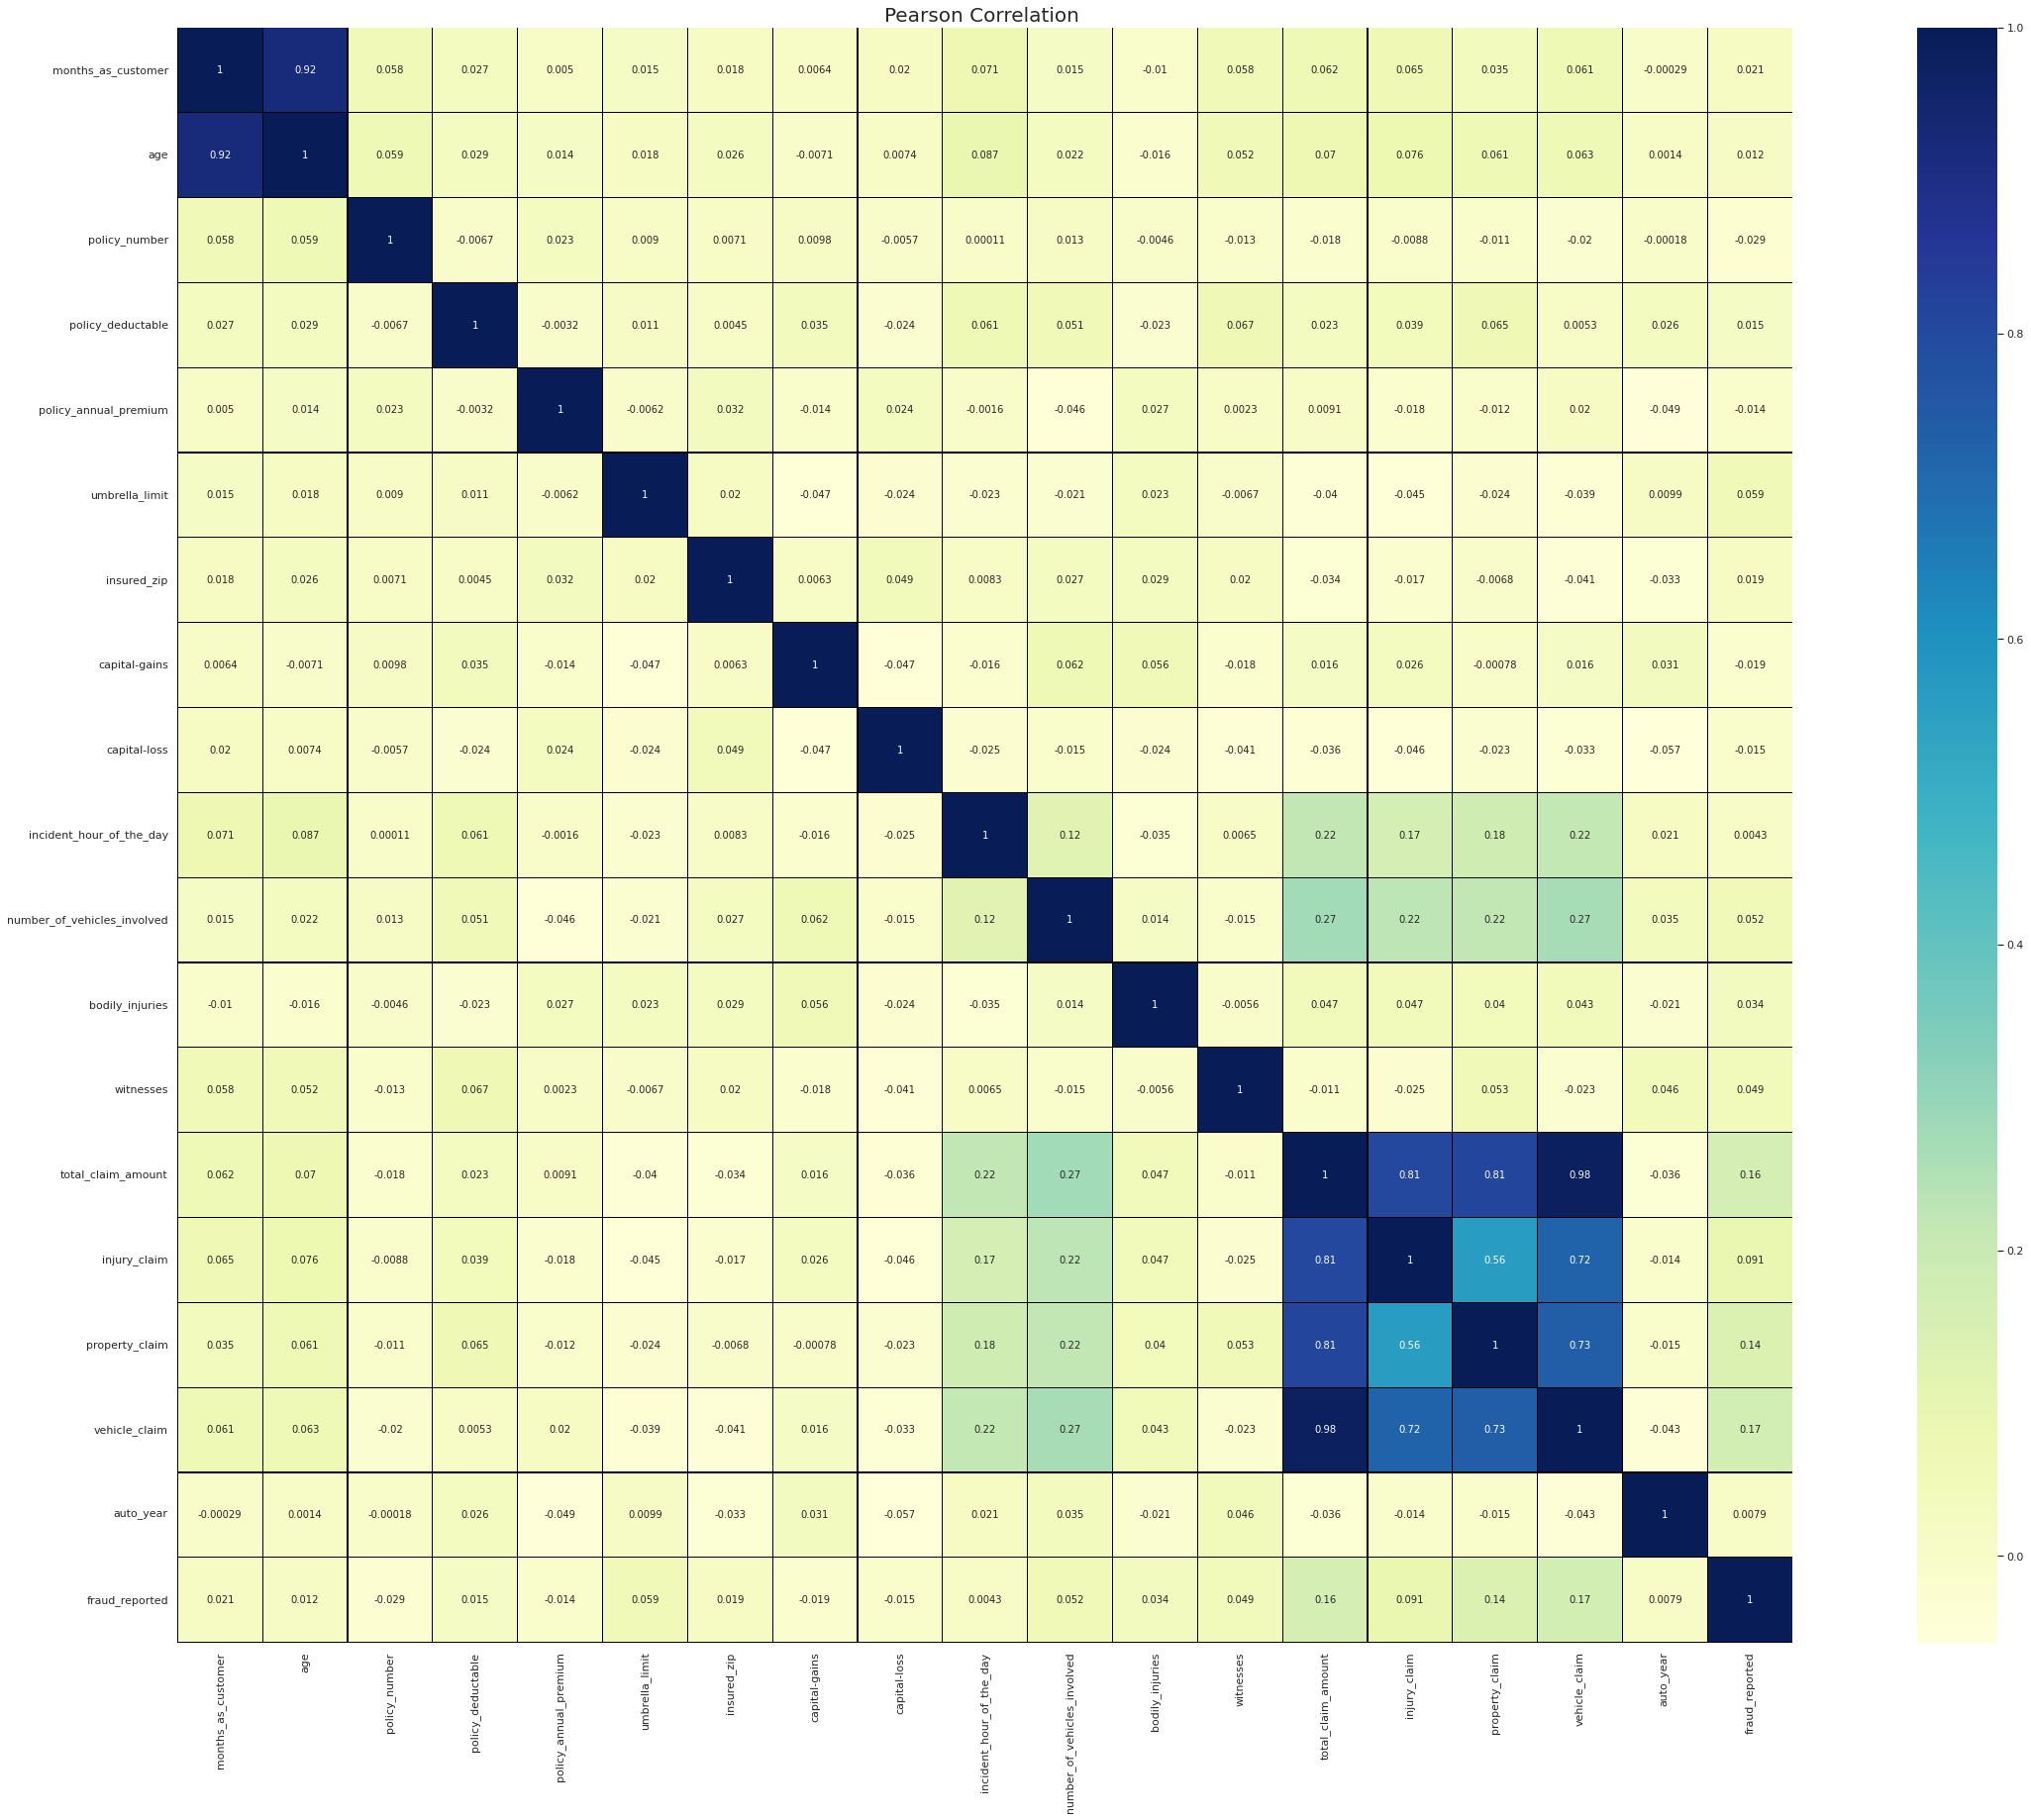

In [39]:


f, ax = plt.subplots(figsize=(45, 30))
plt.title('Pearson Correlation ',fontsize = 20)
sns.heatmap(datos.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)



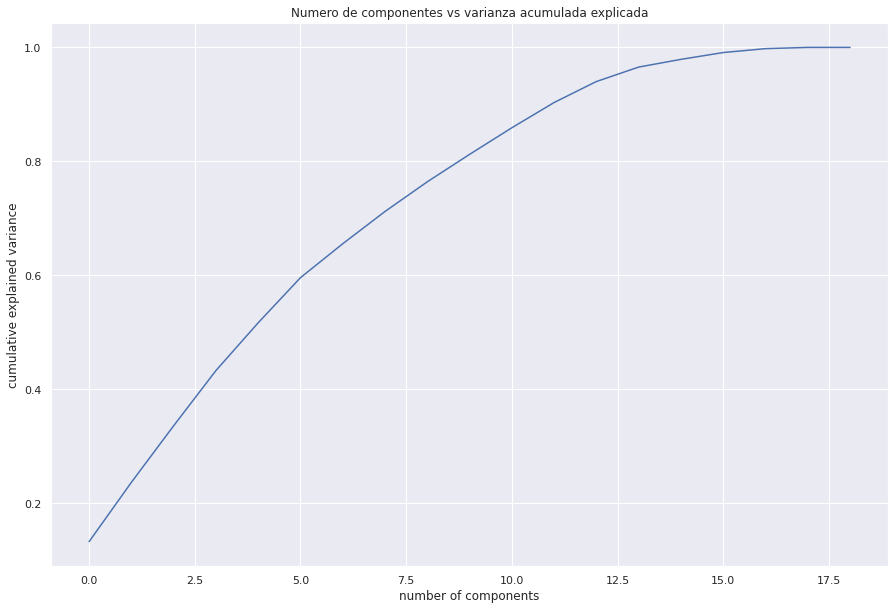

In [41]:
from sklearn.decomposition import PCA

pca = PCA().fit(datos)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Numero de componentes vs varianza acumulada explicada")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

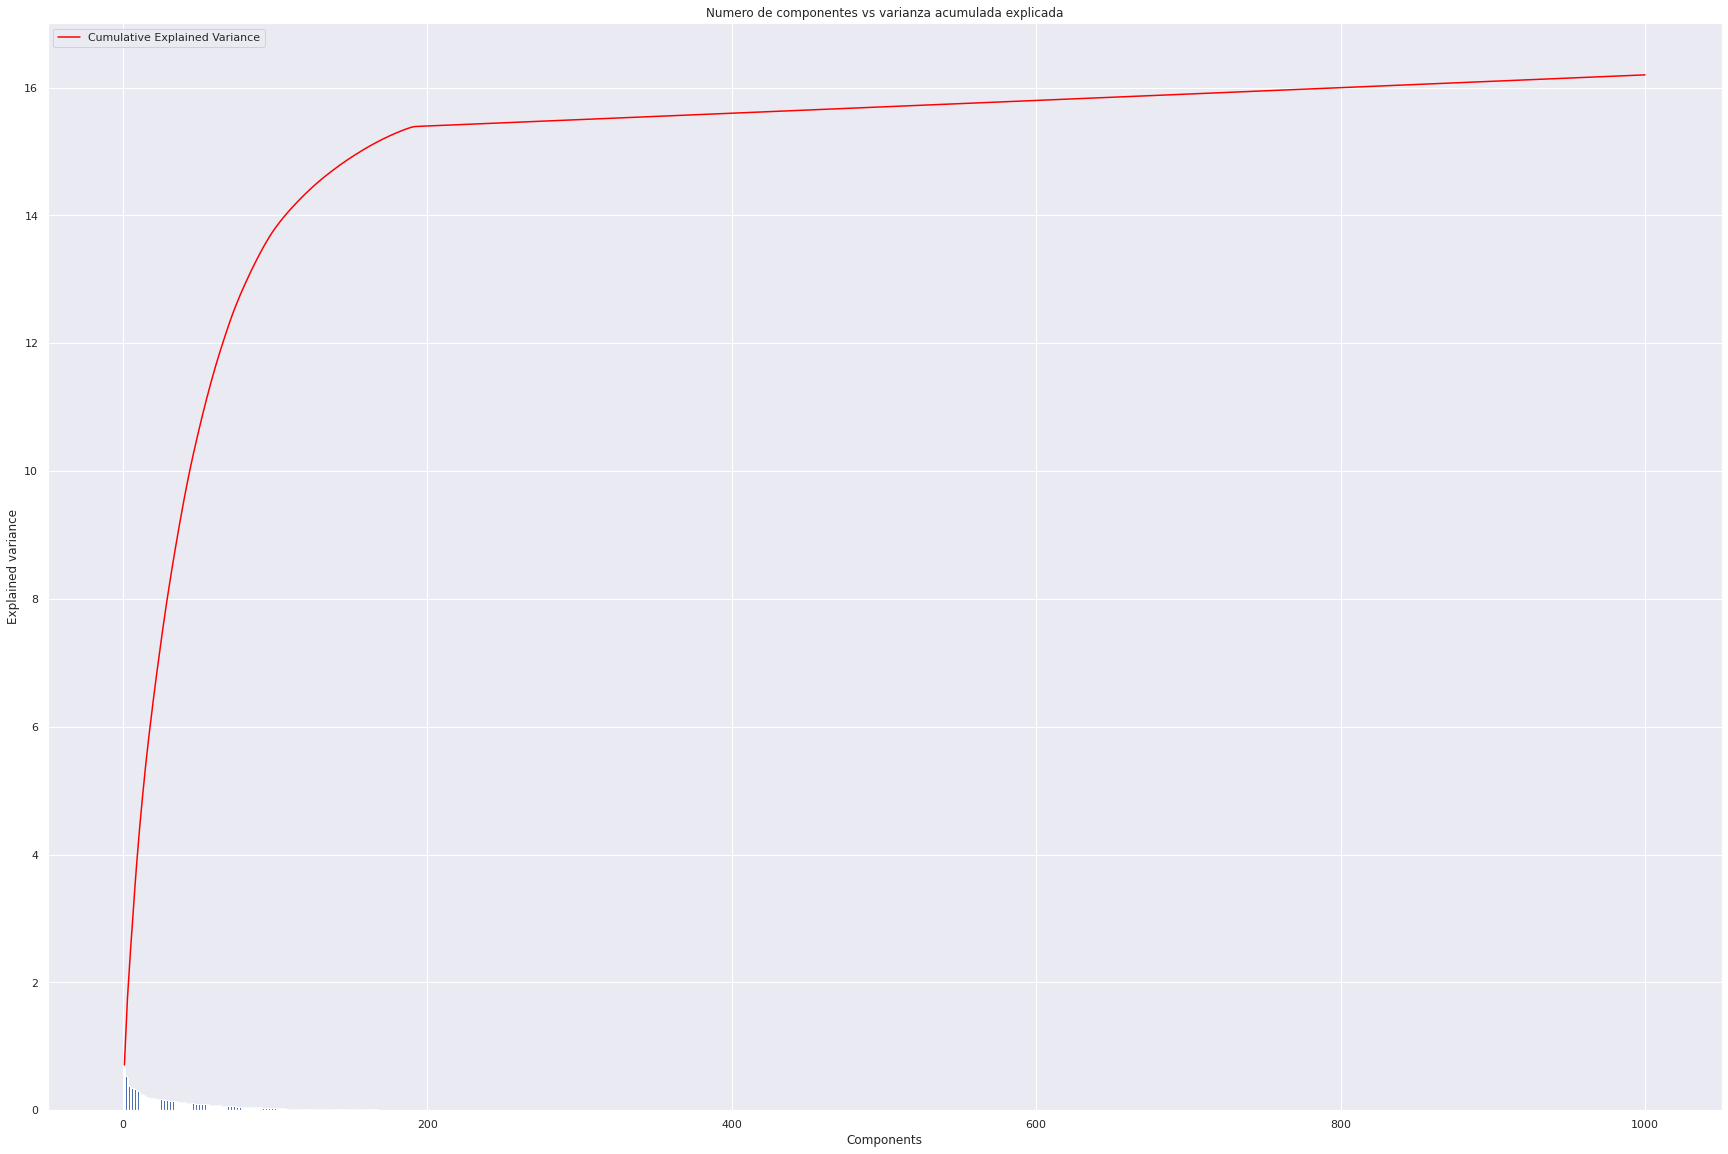

In [48]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.title("Numero de componentes vs varianza acumulada explicada")
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')


In [43]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = datos.dropna().columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
variable,,,,,,,,,,,,,,,,,,,
months_as_customer,0.056642,-0.052941,-0.011013,0.006127,0.060312,-0.105331,-0.321694,0.588179,0.121382,0.019968,0.317268,-0.048342,0.044026,-0.023127,0.007548,0.007224,0.047214,-0.637743,1.660584e-16
age,0.049569,-0.049198,-0.015779,0.002273,0.056298,-0.086733,-0.270039,0.490132,0.094950,0.009949,0.256806,-0.046112,0.049249,-0.017232,-0.007843,0.023993,-0.059111,0.766148,-2.259364e-16
policy_number,-0.020722,-0.008770,-0.027900,-0.004299,0.028424,-0.001239,-0.042781,0.348428,0.227598,0.408309,-0.807987,-0.025483,-0.046596,-0.012006,0.016110,0.001852,0.008178,-0.000742,-1.106280e-17
policy_deductable,0.159148,-0.681516,0.072512,0.615624,-0.138483,0.308936,-0.060656,-0.053249,0.018872,0.032111,-0.003611,-0.050164,-0.007158,-0.011807,-0.001280,-0.002766,0.026562,0.001195,1.074247e-16
policy_annual_premium,-0.004935,0.009403,-0.003540,0.010406,0.013006,-0.000033,-0.040127,-0.010371,0.011720,0.003949,-0.016387,-0.000360,-0.014161,-0.009067,-0.983958,-0.143459,-0.090440,-0.015533,-1.960330e-16
umbrella_limit,0.003294,0.020911,0.045001,0.022470,-0.000112,0.022327,-0.008616,0.033312,-0.003980,-0.013807,-0.013564,-0.073736,0.099194,0.989401,-0.006407,-0.026606,0.002003,-0.002242,-3.024715e-17
insured_zip,0.013077,0.077600,0.087740,0.206128,0.947851,0.141454,-0.016614,-0.064670,-0.113363,0.067737,0.001138,-0.007117,0.049951,-0.016311,0.012734,0.003279,0.017298,-0.002644,-7.351944e-20
capital-gains,0.020245,0.000063,-0.067923,0.066872,-0.006296,0.030764,0.194720,0.091481,0.021186,0.330225,0.185322,0.868139,-0.192590,0.090975,-0.009332,0.012627,-0.007217,0.007746,2.058695e-16
capital-loss,-0.033026,0.014324,0.012904,-0.022638,0.063813,0.054504,-0.074947,-0.015395,0.126191,-0.082864,0.053723,-0.183122,-0.958360,0.080462,0.020594,-0.022025,-0.000582,0.008981,-1.766789e-18


In [45]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 30,20

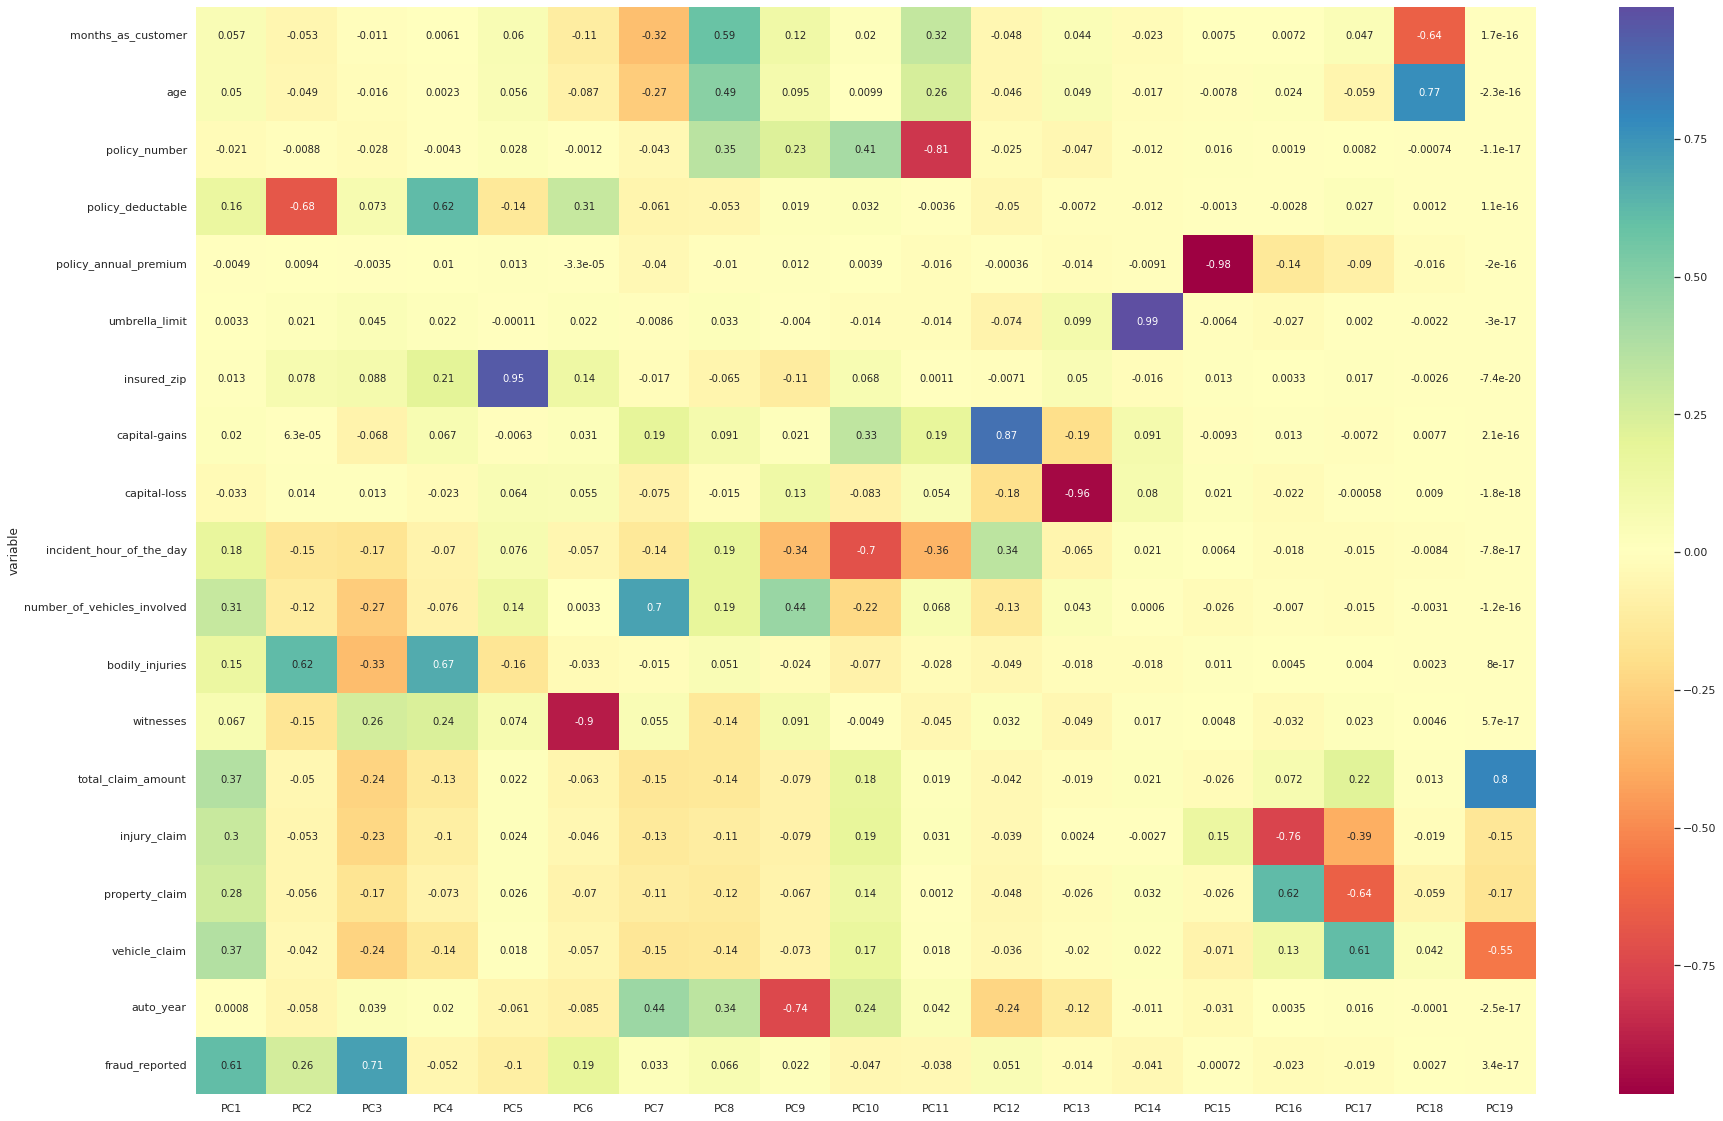

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

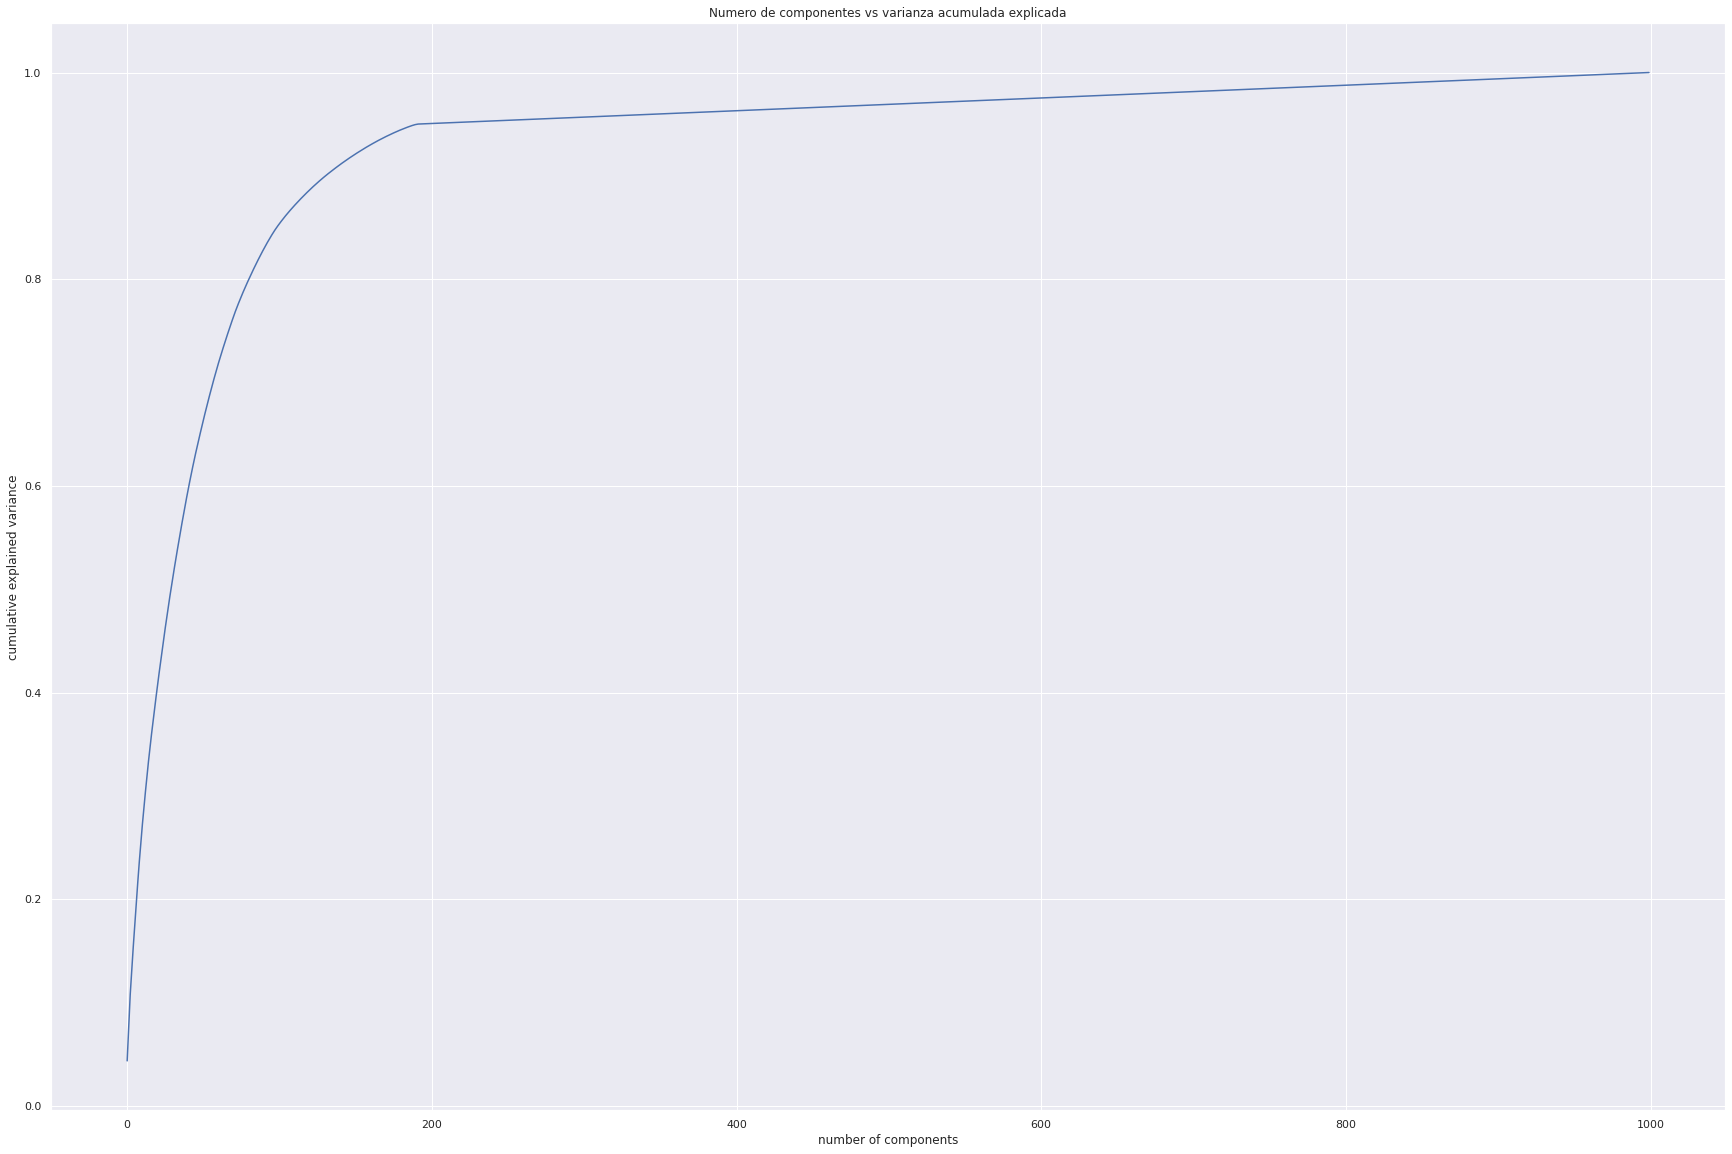

In [49]:
datos0 = df3.iloc[:,0:-1]
datos=datos0.select_dtypes(include=np.number)
pca = PCA().fit(datos)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Numero de componentes vs varianza acumulada explicada")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Lo que nos muestra esta grafica es cuanta de la varianza de los datos originales logra representar con n numero de componentes. Normalmente se busca que este cercana al 0.9 por eso se seleccionaron en numero de componentes 200

## Modelado

Para la selección del algoritmo de entrenamiento se probaran los siguentes modelos de clasificación:     



*   Random Forest Classifier
*   Random Forest Classifier con PCA
*   SVM 
*   SVM con PCA



In [50]:
df3.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,type_road_Ave,type_road_Drive,type_road_Hwy,type_road_Lane,type_road_Ridge,type_road_St
0,0.684760,0.644444,0.468247,2014-10-17,0.333333,0.603112,0.090909,0.188769,0.530348,1.000000,...,0,0,0,0,0,1,0,0,0,0
1,0.475992,0.511111,0.269370,2006-06-27,1.000000,0.473214,0.545455,0.199478,0.000000,1.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.279749,0.222222,0.653098,2000-09-06,1.000000,0.606972,0.545455,0.002766,0.349254,1.000000,...,0,0,0,0,0,0,0,1,0,0
3,0.534447,0.488889,0.141334,1990-05-25,1.000000,0.608582,0.636364,0.932699,0.486567,0.438344,...,0,0,0,0,0,1,0,0,0,0
4,0.475992,0.555556,0.296730,2014-06-06,0.333333,0.712760,0.636364,0.946264,0.656716,0.585959,...,0,0,0,0,1,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
X = df3.drop(columns="fraud_reported")
X=X.select_dtypes(include=np.number)
y = df3['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier


# Creamos un Random Forest y lo entrenamos!
classifier = RandomForestClassifier(random_state=3)
classifier.fit(X_train, y_train)

# Calculamos las predicciones!
predictions = classifier.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.732


In [54]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.6666666666666666


In [55]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.1518987341772152


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       180
         1.0       0.67      0.09      0.15        70

    accuracy                           0.73       250
   macro avg       0.70      0.53      0.50       250
weighted avg       0.72      0.73      0.65       250



<Figure size 1080x720 with 0 Axes>

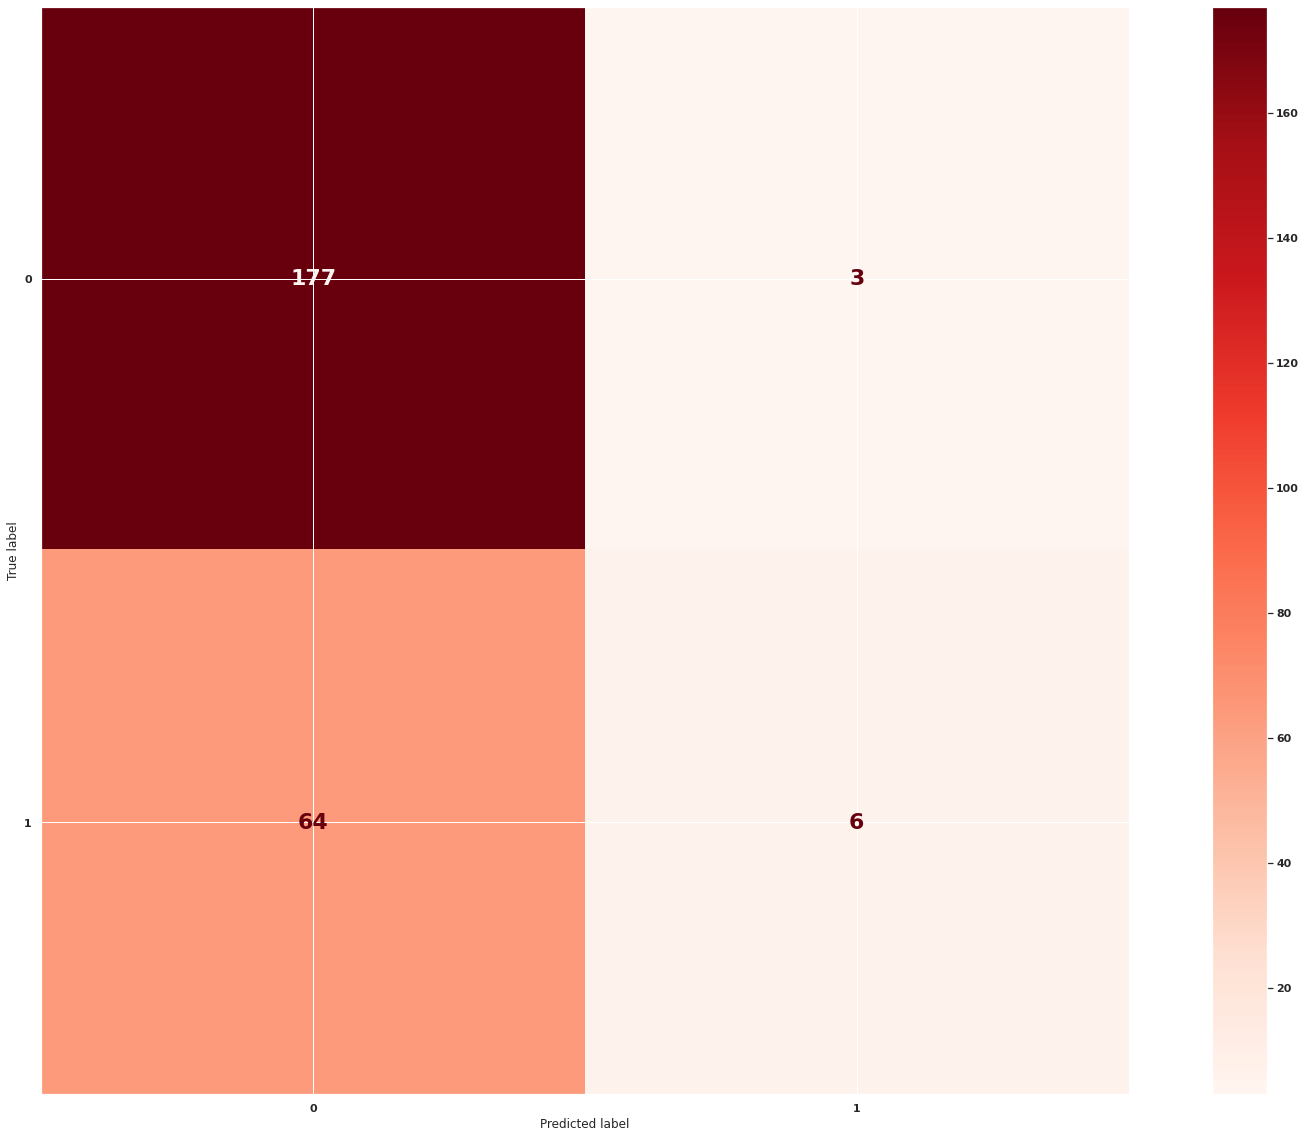

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#rcParams['figure.figsize'] = 10,10


plt.figure(figsize=(15,10))
font = {'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(include_values=True, cmap="Reds", ax=None)

AUC for our classifier is: 0.5345238095238094


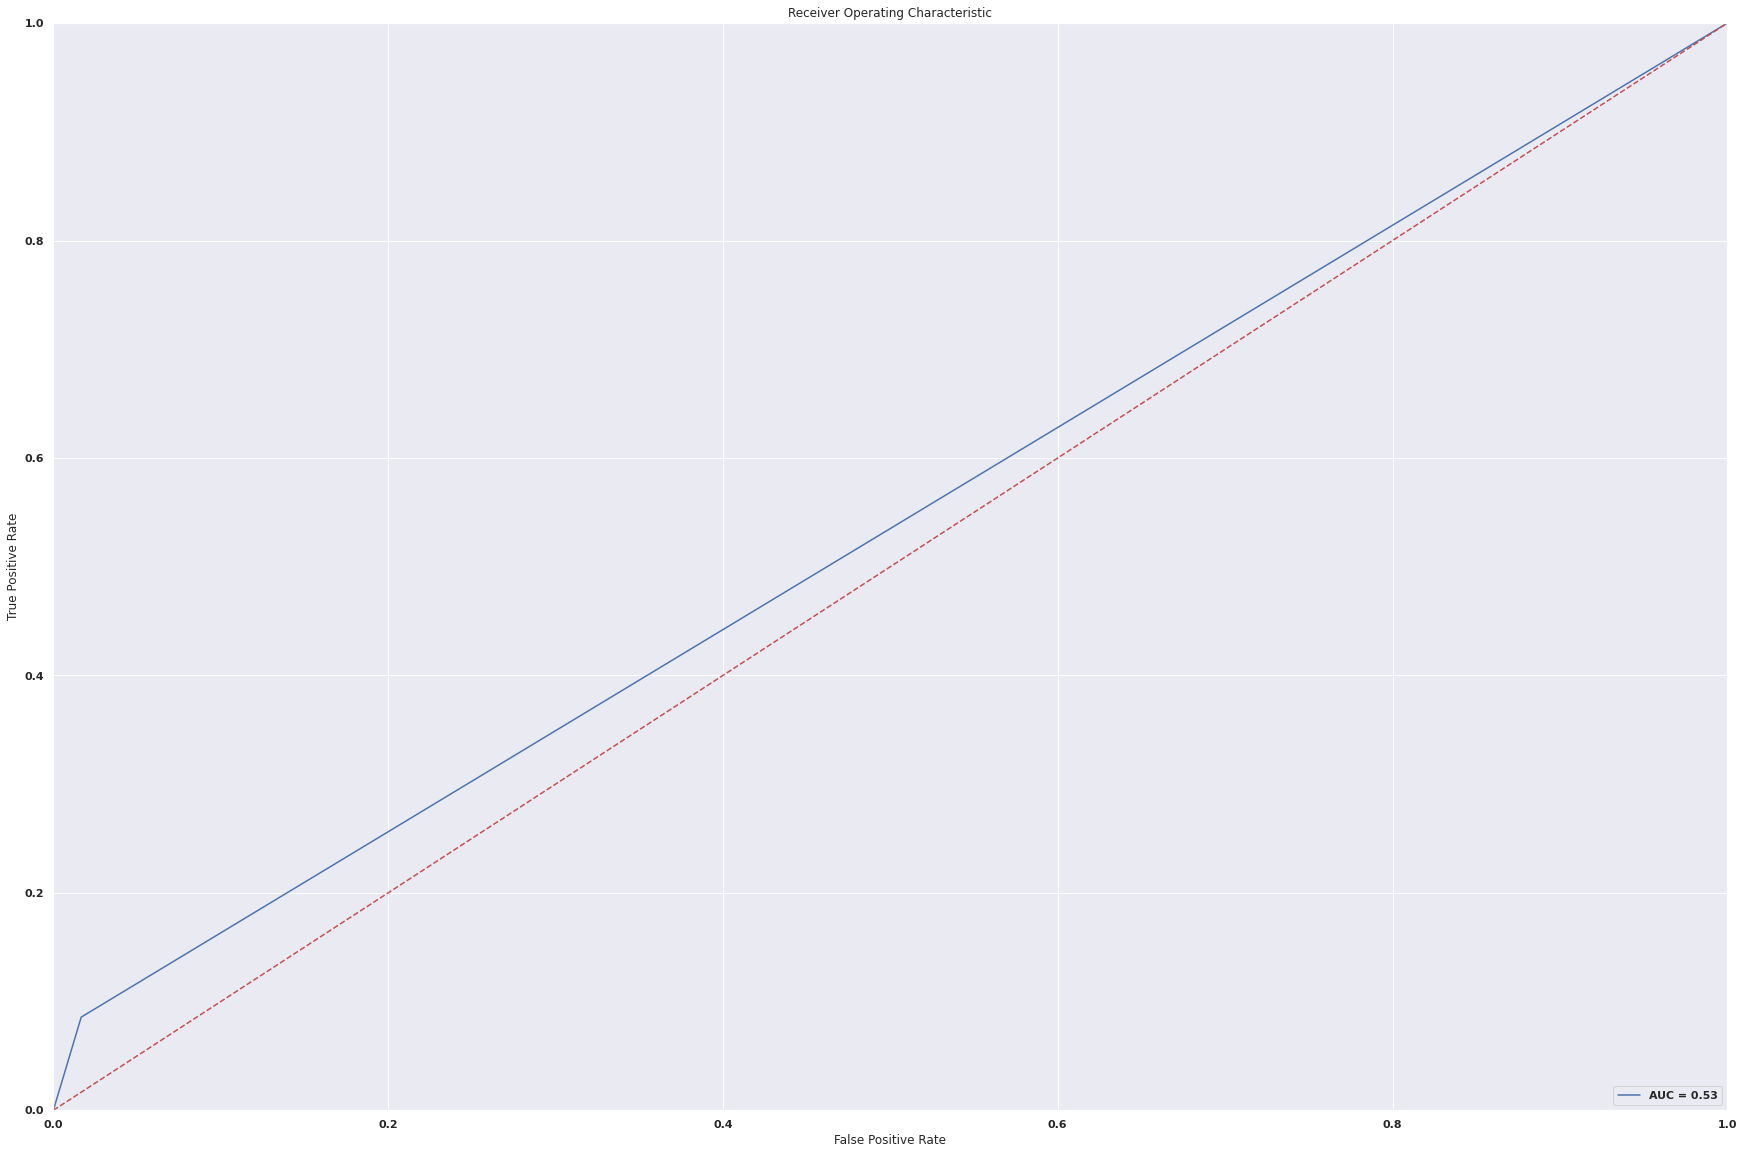

In [58]:
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Random Froest con PCA

In [59]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline( PCA(n_components=180), RandomForestClassifier())
pipeline.fit(X=X_train, y=y_train)
predictions = pipeline.predict(X_test)

In [60]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

Accuracy of the classifier is: 0.72
Precision Score of the classifier is: 0.5
F1 Score of the classifier is: 0.02777777777777778


In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.84       180
         1.0       0.50      0.01      0.03        70

    accuracy                           0.72       250
   macro avg       0.61      0.50      0.43       250
weighted avg       0.66      0.72      0.61       250



<Figure size 1080x720 with 0 Axes>

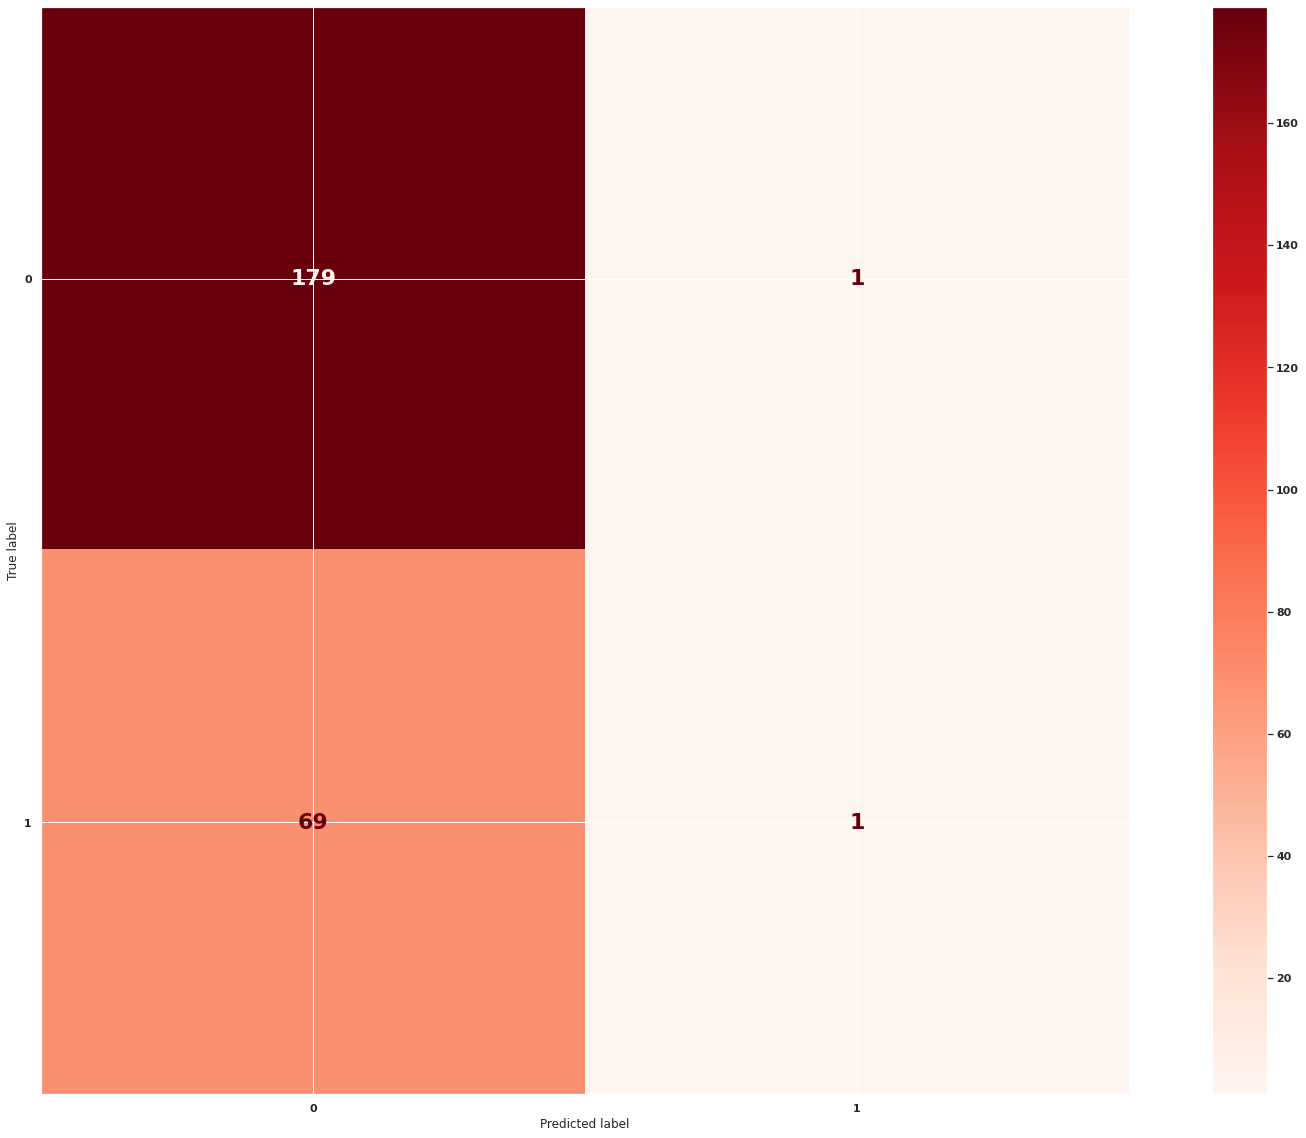

In [62]:
plt.figure(figsize=(15,10))
font = {'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(include_values=True, cmap="Reds", ax=None)

AUC for our classifier is: 0.5043650793650793


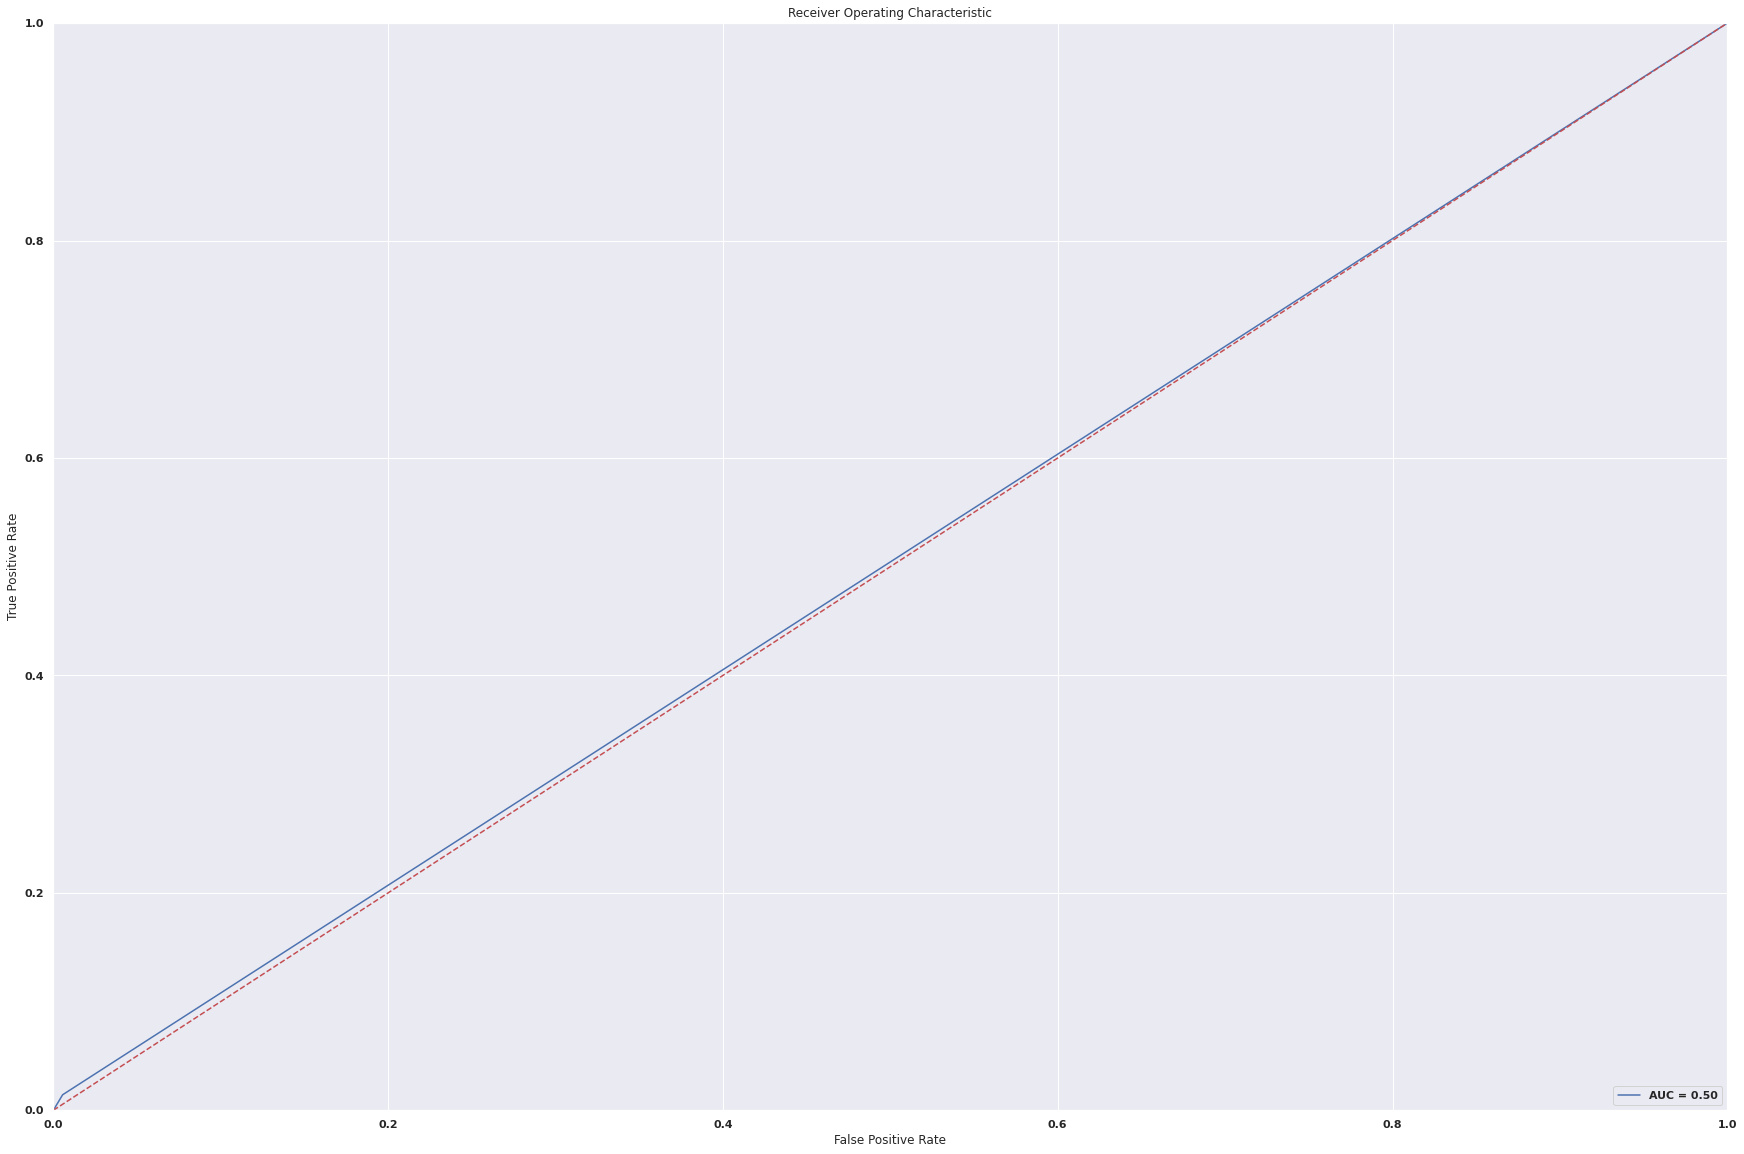

In [63]:
class_probabilities = pipeline.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [64]:
from sklearn.svm import SVC

modelo = SVC(C = 10, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

predictions = modelo.predict(X_test)

In [65]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

Accuracy of the classifier is: 0.844
Precision Score of the classifier is: 0.746031746031746
F1 Score of the classifier is: 0.706766917293233


In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       180
         1.0       0.75      0.67      0.71        70

    accuracy                           0.84       250
   macro avg       0.81      0.79      0.80       250
weighted avg       0.84      0.84      0.84       250



<Figure size 1080x720 with 0 Axes>

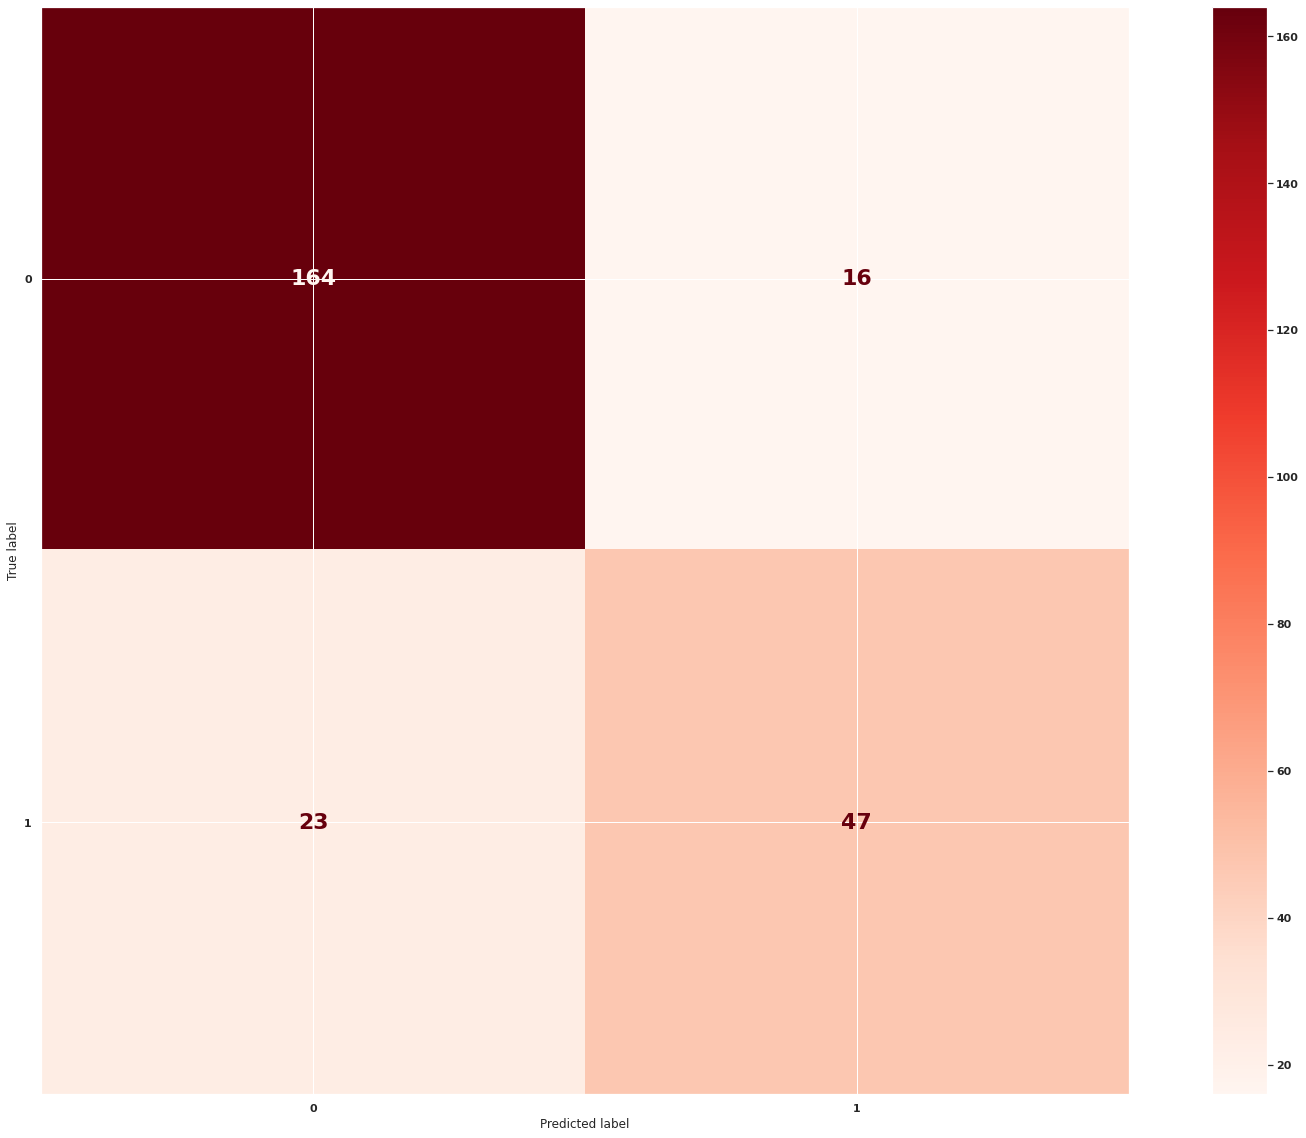

In [67]:
plt.figure(figsize=(15,10))
font = {'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(include_values=True, cmap="Reds", ax=None)

AUC for our classifier is: 0.7912698412698412


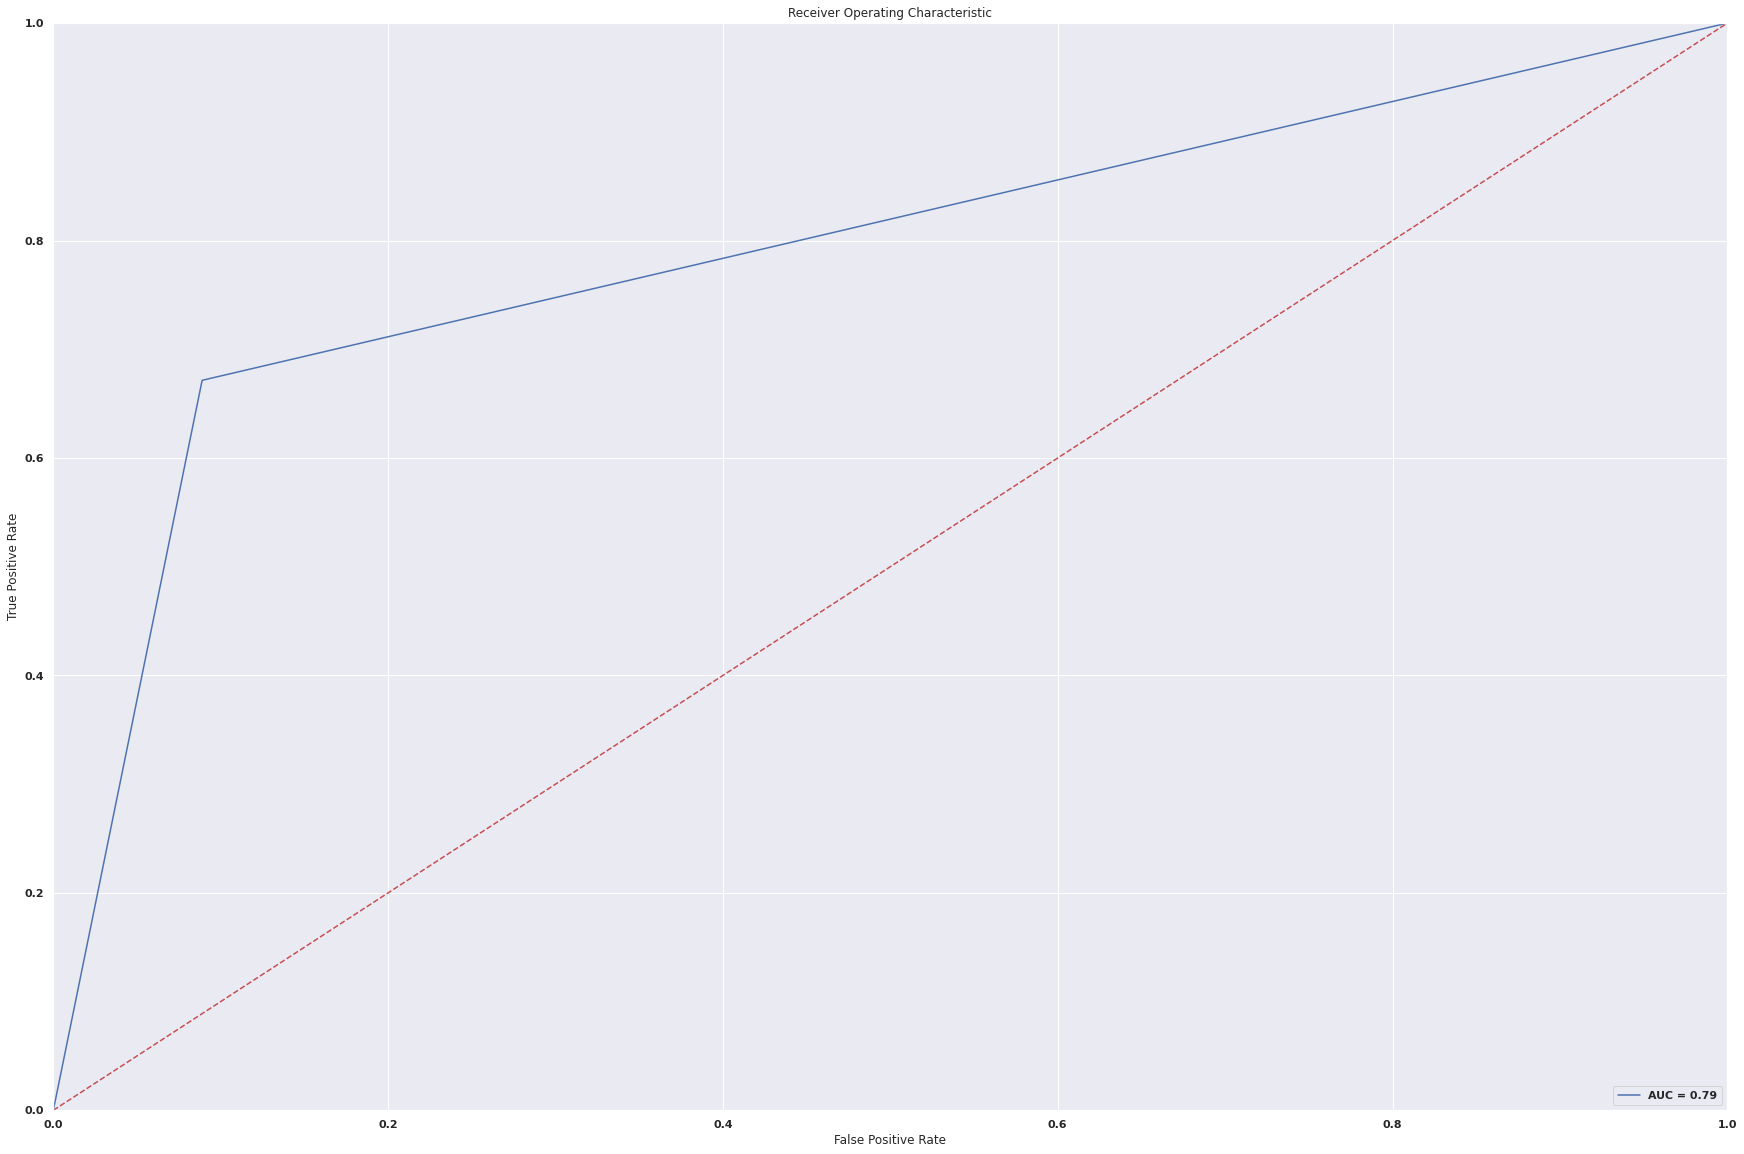

In [68]:
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM con PCA

In [69]:
pipeline2 = make_pipeline( PCA(n_components=690), SVC(C = 200, kernel = 'linear', random_state=123))
pipeline2.fit(X=X_train, y=y_train)
predictions = pipeline2.predict(X_test)

In [70]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

Accuracy of the classifier is: 0.848
Precision Score of the classifier is: 0.7580645161290323
F1 Score of the classifier is: 0.7121212121212119


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       180
         1.0       0.76      0.67      0.71        70

    accuracy                           0.85       250
   macro avg       0.82      0.79      0.80       250
weighted avg       0.84      0.85      0.85       250



<Figure size 1080x720 with 0 Axes>

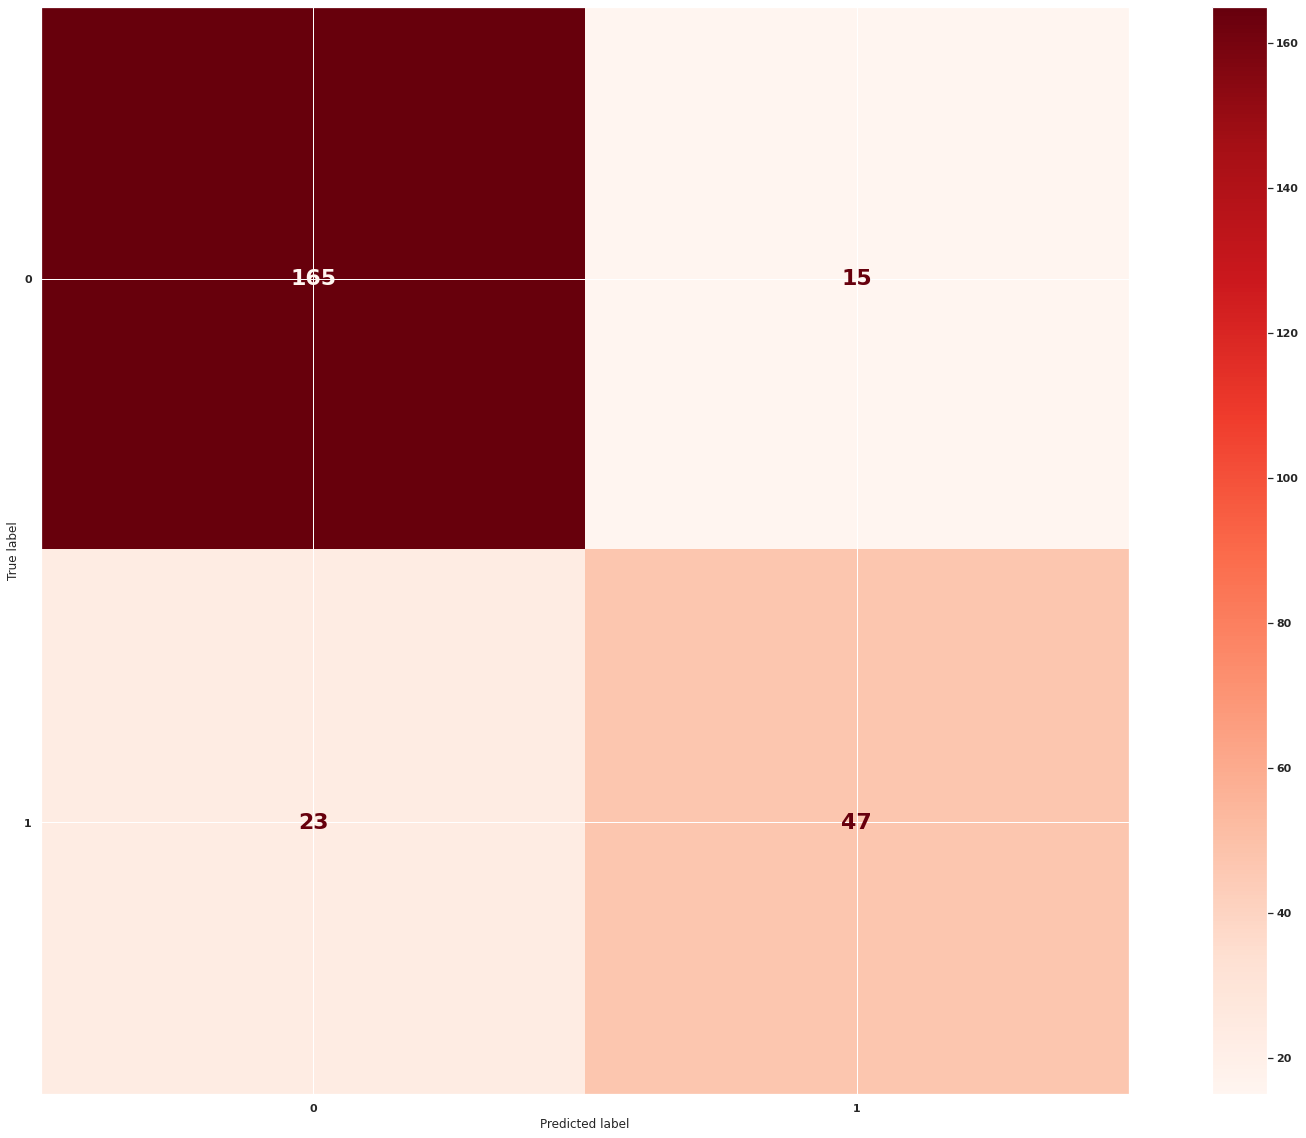

In [72]:
plt.figure(figsize=(15,10))
font = {'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(include_values=True, cmap="Reds", ax=None)

AUC for our classifier is: 0.794047619047619


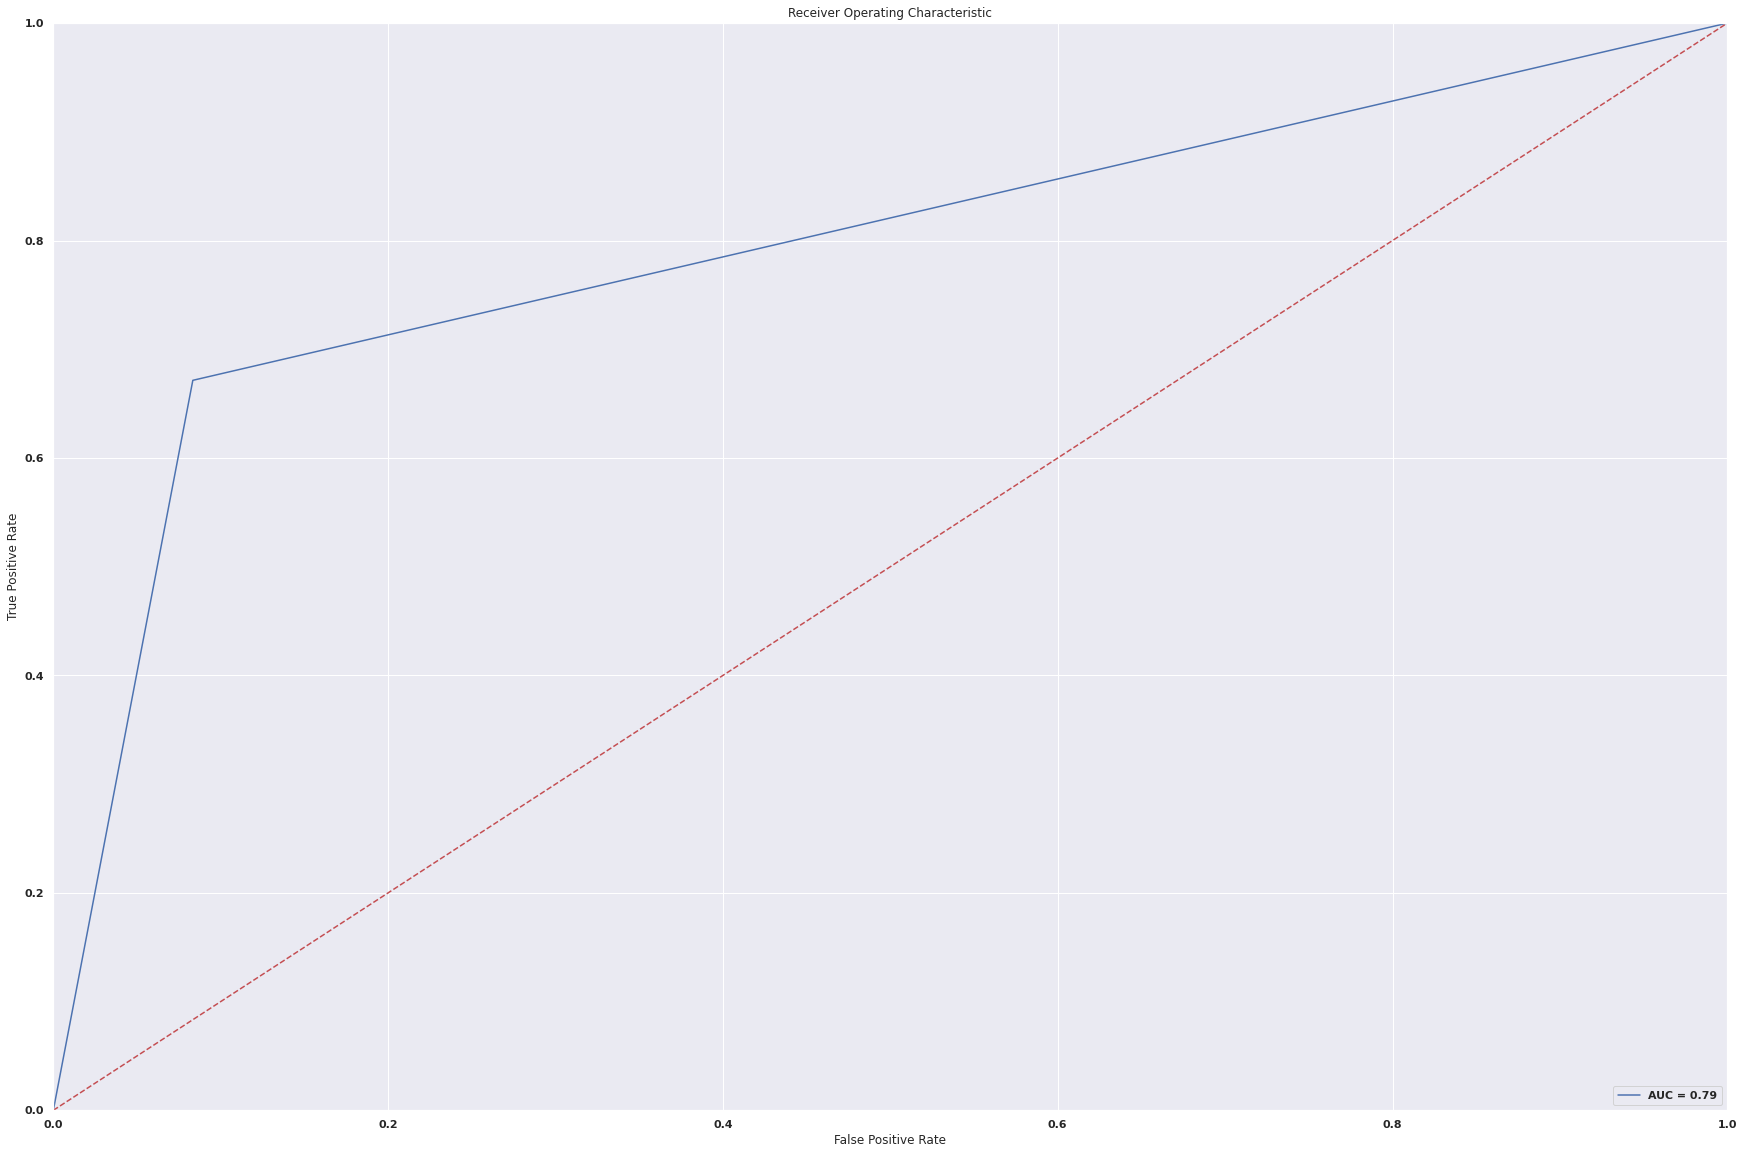

In [73]:
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Metricas

Para este caso lo que nos iteresa es que el modelo sea capaz de detectar cuando es fraude.Y no queremos que deje pasar un caso que es fraude como si no lo fuera ya que eso implica perdidas para la compañia aseguradora. EL caso de que detecte una reclamacion como fraude que en realidad no lo es, no es tan grave ya que se podria verififcar manualmente esos casos.Por lo tanto, es mejor minimizar los falsos negativos en este caso 






Ya que nos interesan los casos de fraude vamos a centrarnos en las metricas de los casos en que hay fraude

|  Clasificador | Presicion  |Recall   | f1-score   | support  |
|---|---|---|---|---|
| Random Forest Classifier  | 0.67  |0.09   | 0.15  | 70  |
| Random Forest Classifier con PCA  | 0.67  | 0.03  | 0.05  | 70  |
|  SVM  | 0.75  | 0.67  | 0.71  | 70  |
|  SVM con PCA  | 0.76  | 0.67  | 0.71  | 70  |

Como pedemos ver SVM nos da mejores resultados

# Modelos de ensamble y Boosting models

Ahora agregamos a la comparación de modelos algunos modelos de ensamble para compararlos contra svm que fue nuestro mejor modelo de la seleccion pasada

In [74]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Scrip liviano de competencia de modelos
    :param X_train: datos entrenameinto
    :param y_train: Vector target entreameinto
    :param X_test: datos de testeo
    :param y_test: Vector target testeo 
    :return: DataFrame de predicciones
    '''
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('LGBM', LGBMClassifier()),
              ('XGB', XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)),
              ('SVC', SVC(C = 200, kernel = 'linear', random_state=123)),
            ]
    
    results = []
    
    names = []
    
    scoring = ['accuracy', 'recall_weighted', 'roc_auc']
    target_names = ['no fraude', 'fraude']
    
    for name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred, target_names=target_names))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
            
    final = pd.concat(dfs, ignore_index=True)
    return final


In [76]:
final = run_exps(X_train,y_train, X_test , y_test)

LogReg
              precision    recall  f1-score   support

   no fraude       0.83      0.93      0.88       180
      fraude       0.74      0.50      0.60        70

    accuracy                           0.81       250
   macro avg       0.79      0.72      0.74       250
weighted avg       0.80      0.81      0.80       250

RF
              precision    recall  f1-score   support

   no fraude       0.73      0.99      0.84       180
      fraude       0.67      0.06      0.11        70

    accuracy                           0.73       250
   macro avg       0.70      0.52      0.47       250
weighted avg       0.71      0.73      0.63       250

LGBM
              precision    recall  f1-score   support

   no fraude       0.85      0.93      0.89       180
      fraude       0.77      0.57      0.66        70

    accuracy                           0.83       250
   macro avg       0.81      0.75      0.77       250
weighted avg       0.83      0.83      0.82       250

XGB


Como podemos ver con XGB tienen in f1 en casoso de fraude mas alto que el SVC, por lo que nos vamos a quedar con XGB como nuestro modelo final

## Resultados Finales

In [77]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

In [78]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

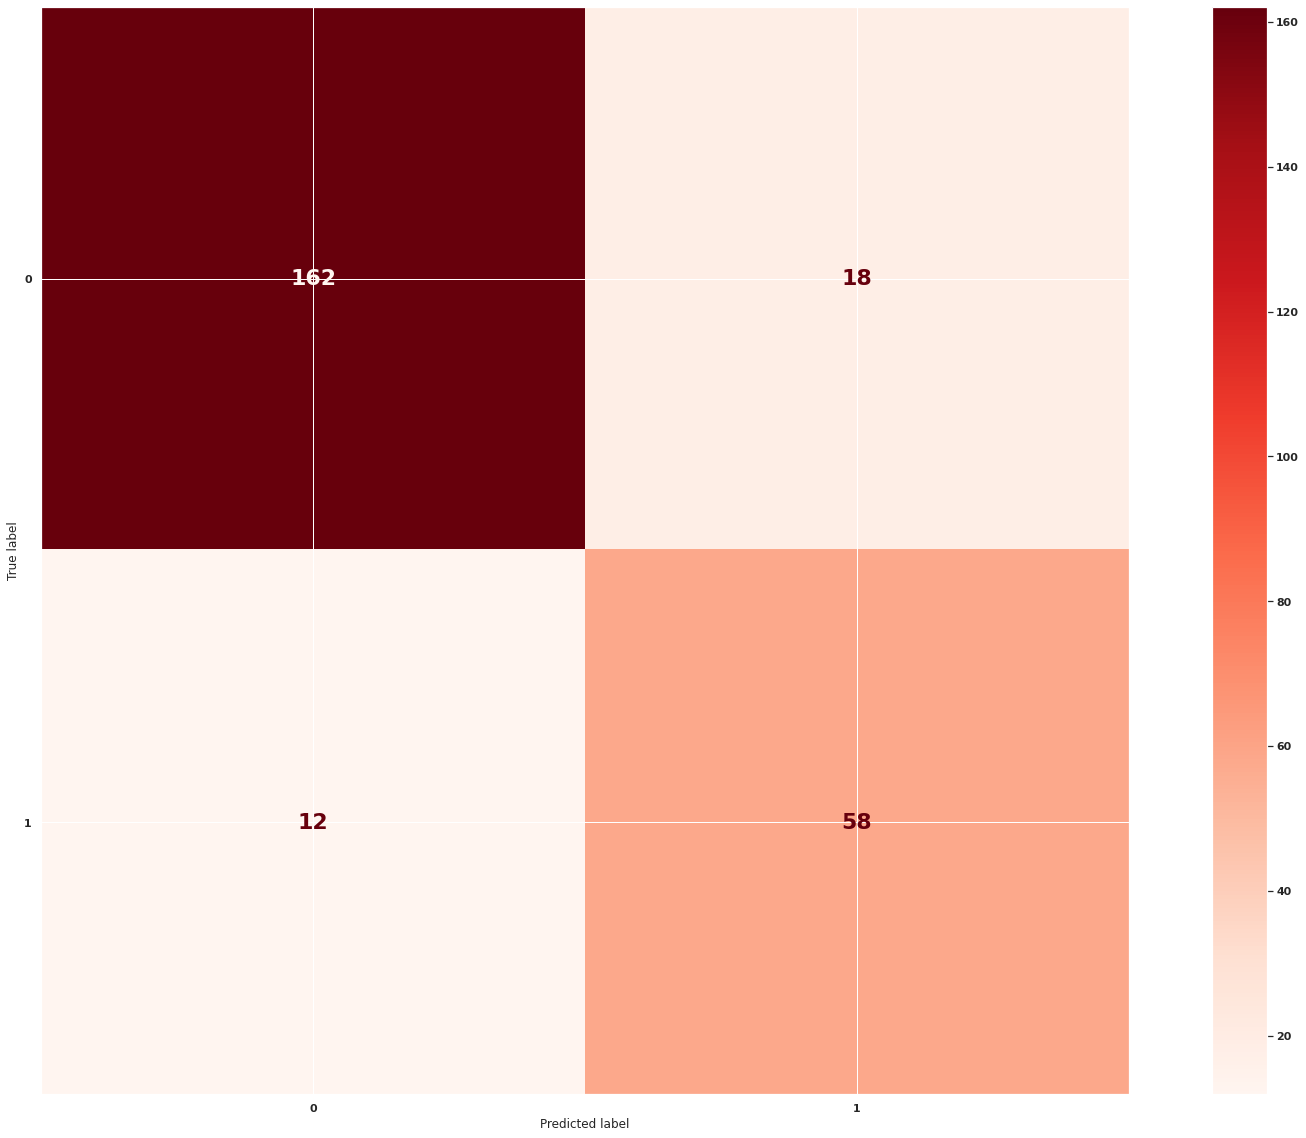

In [79]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(include_values=True, cmap="Reds", ax=None)

In [80]:
cm

array([[162,  18],
       [ 12,  58]])

In [81]:
fraud_accuracy = cm[1][1] / (cm[1][0] + cm[1][1])

In [83]:
print(f"El modelo XGBoost fue capaz de detectar el {fraud_accuracy * 100:.2f} % casos de fraude")

El modelo XGBoost fue capaz de detectar el 82.86 % casos de fraude


## Conclusión

Como se puede observar en los resultados presentados anteriormente el modelo propuesto puede ser de gran ayuda para los equipos de auditoria de las aseguradoras a lo hora de detectar fraude de automobvil ya que es capaz de detectar el 82.86 % de los casos fraudulentos lo que representaria una gran reduccion en las perdidas que año tras año sufren las aseguradoras debido al fraude


